<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Delhivery-case-study/blob/main/delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DELHIVERY BIZ CASE STUDY - FEATURE ENGINEERING

## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.



## The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it



## **Concept Used:**

1. Feature Creation

2. Relationship between Features

3. Column Normalization /Column Standardization

4. Handling categorical values

5. Missing values - Outlier treatment / Types of outliers


we need functions and methods to do all these analysis, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

To perform Hypothesis testing we need to import few test functions and one hot encoding functions

In [ ]:
from scipy.stats import ttest_ind,kstest,shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery.csv

--2024-01-12 12:51:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.155.174.85, 18.155.174.48, 18.155.174.166, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.155.174.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M   183MB/s    in 0.3s    

2024-01-12 12:51:22 (183 MB/s) - ‘delhivery.csv’ saved [55617130/55617130]



In [ ]:
df = pd.read_csv('delhivery.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
116325,training,2018-09-23 21:35:15.306531,thanos::sroute:207339fb-6d6d-4310-9a01-2f12de3...,FTL,trip-153773851530618317,IND415605AAA,Chiplun_LxmiNiws_D (Maharashtra),IND415709AAA,Khed_Mahad_D (Maharashtra),2018-09-24 05:13:26.362911,...,2018-09-24 05:41:59,22.514705,59.0,22.0,28.8958,2.681818,59.0,22.0,28.8958,2.681818


### TO ANALYSE THE BASIC METRICS/ BASIC STRUCTURE OF THE DATA:


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(144867, 24)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

3476808

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=144867, step=1)

In [ ]:
# TO GET THE COLUMNS NAMES

df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

df.keys()

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# To get memory usage of each column

df.memory_usage()

Index                                 128
data                              1158936
trip_creation_time                1158936
route_schedule_uuid               1158936
route_type                        1158936
trip_uuid                         1158936
source_center                     1158936
source_name                       1158936
destination_center                1158936
destination_name                  1158936
od_start_time                     1158936
od_end_time                       1158936
start_scan_to_end_scan            1158936
is_cutoff                          144867
cutoff_factor                     1158936
cutoff_timestamp                  1158936
actual_distance_to_destination    1158936
actual_time                       1158936
osrm_time                         1158936
osrm_distance                     1158936
factor                            1158936
segment_actual_time               1158936
segment_osrm_time                 1158936
segment_osrm_distance             

In [ ]:
# to get number of unique values in each column

df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [ ]:
# To get the Time period for which the data is been taken


mini = df['trip_creation_time'].min()
maxi = df['od_end_time'].max()
print(f'start period : {mini}')
print(f'end period : {maxi}')

start period : 2018-09-12 00:00:16.535741
end period : 2018-10-08 03:00:24.353479


### INFERENCE:

The given data is form the year **2018** and confined from **12th september** and **08th october** months.

In [ ]:
# TO GET THE STATISTICAL SUMMARY:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
df.describe(include = object).T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [ ]:
df['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [ ]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [ ]:
df['source_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)            23347
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Shahjhnpur_NavdaCln_D (Uttar Pradesh)        1
Soro_UttarDPP_D (Orissa)                     1
Kayamkulam_Bhrnikvu_D (Kerala)               1
Krishnanagar_AnadiDPP_D (West Bengal)        1
Faridabad_Old (Haryana)                      1
Name: source_name, Length: 1498, dtype: int64

In [ ]:
df['destination_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
                                     ...  
Hyd_Trimulgherry_Dc (Telangana)          1
Vijayawada (Andhra Pradesh)              1
Baghpat_Barout_D (Uttar Pradesh)         1
Mumbai_Sanpada_CP (Maharashtra)          1
Basta_Central_DPP_1 (Orissa)             1
Name: destination_name, Length: 1468, dtype: int64

### INFERENCE FROM RAW DATA:

1. There are more **training**(104858) data

2. **FTL**(Full Truck Load)(99660) - is the most preferred transportation type

3. Most trip is originated at **Gurgaon_Bilaspur_HB (Haryana)** (23347)

4. Majority of the trips are destinated to **Gurgaon_Bilaspur_HB (Haryana)** (15192)       

### DROPPING ALL THE UNKNOWN FIELDS

The unknown fields has been removed from the original data to perform further analysis.

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(columns = unknown_fields, inplace=True)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')


### MISSING VALUE DETECTION

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

### INFERENCE:

There are no null values/missing values in the dataframe except for two columns,

1. source_name  - which has 293 missing values

2. destination_name - which has 261 missing values

### NUMBER OF UNKNOWN SOURCE & DESTINATION CENTERS:

In [ ]:
df.loc[df['source_name'].isnull()]['source_center'].nunique()

10

In [ ]:
df.loc[df['destination_name'].isnull()]['destination_center'].nunique()


13

### DEALING WITH NULL VALUES:

In [ ]:
df['source_name'].fillna('No name',inplace=True)
df['destination_name'].fillna('No name',inplace=True)

In [ ]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

### INFERENCE:

The null values have been replaced by 'No name'.

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

### INFERENCE:

We can see that,

1. Columns involving time are in different data type
2. Also,columns with 2 unique entries implies that they are categorical

### CHANGING THE DTYPE:

In [ ]:
df[['data','route_type']] = df[['data','route_type']].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   data                            144867 non-null  category
 1   trip_creation_time              144867 non-null  object  
 2   route_schedule_uuid             144867 non-null  object  
 3   route_type                      144867 non-null  category
 4   trip_uuid                       144867 non-null  object  
 5   source_center                   144867 non-null  object  
 6   source_name                     144867 non-null  object  
 7   destination_center              144867 non-null  object  
 8   destination_name                144867 non-null  object  
 9   od_start_time                   144867 non-null  object  
 10  od_end_time                     144867 non-null  object  
 11  start_scan_to_end_scan          144867 non-null  float64 
 12  ac

### TO CHANGE INTO DATETIME DTYPE:

In [ ]:
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for element in datetime_columns:
    df[element] = pd.to_datetime(df[element])



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26368 non-null  object        
 1   source_center                   26368 non-null  object        
 2   destination_center              26368 non-null  object        
 3   data                            26368 non-null  category      
 4   route_type                      26368 non-null  category      
 5   trip_creation_time              26368 non-null  datetime64[ns]
 6   source_name                     26368 non-null  object        
 7   destination_name                26368 non-null  object        
 8   od_start_time                   26368 non-null  datetime64[ns]
 9   od_end_time                     26368 non-null  datetime64[ns]
 10  start_scan_to_end_scan          26368 non-null  float64       
 11  ac

### INFERENCE:

Now, We can clearly visualise the change in dtype of few columns which are more relevant to do analysis

### TO MERGE THE ROWS AND AGGREGATING FIELDS

**Hint:**
 We can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their,
  1. Trip_uuid, Source ID and Destination ID
  2. Further aggregate on the basis of just Trip_uuid. We can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.



In [ ]:
df = df.groupby(by = ['trip_uuid', 'source_center', 'destination_center'], as_index=False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})


df.sample(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
13200,trip-153759225203478393,IND788151AAA,IND788713AAA,training,FTL,2018-09-22 04:57:32.035034,Hailakandi_kalibari_D (Assam),Karimganj_Alngjuri_D (Assam),2018-09-22 07:14:22.919298,2018-09-22 09:57:49.596394,163.0,26.195776,86.0,33.0,47.1092,85.0,32.0,47.1092
17598,trip-153791781701278947,IND306116AAA,IND306001AAA,training,FTL,2018-09-25 23:23:37.013015,Falna_SbhRDDPP_D (Rajasthan),MarwarJn_SndbrDPP_D (Rajasthan),2018-09-26 08:20:33.148263,2018-09-26 12:25:08.073790,244.0,65.260866,217.0,79.0,102.6871,215.0,77.0,102.6871
20716,trip-153815881195198465,IND335001AAA,IND125104AAA,test,FTL,2018-09-28 18:20:11.952227,Ganga Nagar_DC (Rajasthan),Sirsa_AnprnDPP_D (Haryana),2018-09-29 03:30:11.804751,2018-09-29 06:19:53.404444,169.0,78.624204,129.0,80.0,109.4237,128.0,93.0,100.8298
2812,trip-153689115788141729,IND501359AAE,IND508252AAB,training,FTL,2018-09-14 02:12:37.881639,Hyderabad_Shamshbd_H (Telangana),Choutuppal_Nagaram_D (Telangana),2018-09-14 02:12:37.881639,2018-09-14 08:14:43.732133,362.0,57.467130,114.0,49.0,70.1924,114.0,47.0,70.1924
22572,trip-153829881746420606,IND282002AAD,IND474003AAA,test,FTL,2018-09-30 09:13:37.464473,No name,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-09-30 16:35:16.023368,2018-09-30 23:58:34.703921,443.0,108.500249,329.0,123.0,120.9101,327.0,120.0,120.9100


In [ ]:
df['trip_uuid'].nunique()

14817

## Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required


In [ ]:
df['od_total_time'] = df['od_end_time'] - df['od_start_time']
df.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df['od_total_time'] = df['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df['od_total_time'].head()


0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
df = df.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


## Build some features to prepare the data for actual analysis. Extract features from the below fields:


In [ ]:
df['source_name'].head(5)

0    Anand_VUNagar_DC (Gujarat)
1    Anand_VUNagar_DC (Gujarat)
2    Anand_VUNagar_DC (Gujarat)
3    Anand_VUNagar_DC (Gujarat)
4    Anand_VUNagar_DC (Gujarat)
Name: source_name, dtype: object

In [ ]:
def extract_city(x):
    if x == 'No name':
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]



In [ ]:
def extract_state(x):
  if x == 'No name':
    return 'State not found'
  else:
    temp = x.split('(')
    if len(temp) == 1:
      return temp[0]
    else:
      return temp[1].replace(')','')

In [ ]:
def extract_place(x):
    if 'No name' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]


### 1. Source Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
df['source_state'] = df['source_name'].apply(extract_state)

print('Number of source states : ',df['source_state'].nunique())

df['source_state'].unique()

Number of source states :  30


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'State not found'], dtype=object)

In [ ]:
df['source_city'] = df['source_name'].apply(extract_city)
print('No of source cities :', df['source_city'].nunique())
df['source_city'].unique()[:50]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat'],
      dtype=object)

In [ ]:
df['source_place'] = df['source_name'].apply(extract_place)
print('Number of source places : ',df['source_place'].nunique())
df['source_place'].unique()[:50]


Number of source places :  757


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L'], dtype=object)

### 2. Destination Name: Split and extract features out of destination. City-place-code (State)


In [ ]:
df['destination_state'] = df['destination_name'].apply(extract_state)
print('Number of destination states : ',df['destination_state'].nunique())
df['destination_state'].unique()


Number of destination states :  32


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'State not found', 'Daman & Diu'], dtype=object)

In [ ]:
df['destination_city'] = df['destination_name'].apply(extract_city)
print('Number of destination city : ',df['destination_city'].nunique())
df['destination_city'].unique()[:50]


Number of destination city :  806


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Ratnagiri',
       'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna', 'Guwahati',
       'Bareli', 'Nashik', 'Hooghly', 'Sivasagar', 'Palani', 'Jalandhar',
       'Chandigarh', 'Yavatmal', 'Sangola', 'Kolkata', 'Savner',
       'Kurnool', 'Bhatinda', 'Bhiwandi', 'Barnala', 'Murbad', 'Kadaba',
       'Gulbarga', 'Naraingarh', 'Ludhiana', 'Kadi', 'Jabalpur',
       'Gangakher', 'Bankura', 'Silvassa', 'Porbandar', 'Jetpur',
       'Khammam', 'Mehsana', 'Katni', 'Una', 'Malavalli'], dtype=object)

In [ ]:
df['destination_place'] = df['destination_name'].apply(extract_place)
print('Number of destination place : ',df['destination_place'].nunique())
df['destination_place'].unique()[:50]


Number of destination place :  843


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'MiraRd_IP',
       'WrdN1DPP_D', 'Poonamallee', 'Vandalur_Dc', 'HBR Layout PC',
       'Central_D_3', 'Bhogal', 'unknown_place', 'MjgaonRd_D',
       'Nelmngla_H', 'Uppal_I', 'RazaviRd_D', 'Central_I_7',
       'Central_I_2', 'Hub', 'SourvDPP_D', 'Varachha_DC', 'TgrniaRD_I',
       'DC', 'Gokulam_D', 'Babupaty_D', 'Bomsndra_HB', 'Alwal_I',
       'RjndraRd_D', 'Mehmdpur_H', 'Sanpada_I', 'JajuDPP_D',
       'Central_DPP_2', 'Dankuni_HB', 'Wagodha_D', 'AbbasNgr_I',
       'Balabhgarh_DPC', 'DPC', 'Mankoli_HB', 'Shamshbd_H', 'SnkunDPP_D',
       'Kharar_DC', 'AnugrDPP_D', 'Nehrugnj_I', 'Ward2DPP_D',
       'MilrGanj_HB', 'KaranNGR_D', 'Adhartal_IP', 'Poonamallee_HB',
       'Busstand_D', 'BhowmDPP_D', 'Samrvrni_D'], dtype=object)

### 3. Trip_creation_time: Extract features like month, year and day etc

In [ ]:
df['trip_creation_time'].head(2)

0   2018-09-12 00:00:16.535741
1   2018-09-12 00:00:22.886430
Name: trip_creation_time, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [ ]:
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_creation_week'] = df['trip_creation_week'].astype('int8')

In [ ]:
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_time'] = df['trip_creation_time'].dt.strftime('%H:%M:%S')


### Data after cleaning:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14817 non-null  object  
 1   source_center                   14817 non-null  object  
 2   destination_center              14817 non-null  object  
 3   data                            14817 non-null  category
 4   route_type                      14817 non-null  category
 5   trip_creation_time              14817 non-null  object  
 6   source_name                     14817 non-null  object  
 7   destination_name                14817 non-null  object  
 8   od_total_time                   14817 non-null  float64 
 9   start_scan_to_end_scan          14817 non-null  float64 
 10  actual_distance_to_destination  14817 non-null  float64 
 11  actual_time                     14817 non-null  float64 
 12  osrm_time         

In [ ]:
df.shape

(14817, 28)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400
trip_creation_year,14817.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [ ]:
df.describe(include = object).T


,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
trip_creation_time,14817,13451,22:08:55,5
source_name,14817,934,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,30,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,757,Bilaspur_HB,1063
destination_state,14817,32,Maharashtra,2561


### TO GET MAX AND MIN PERIOD OF THE TRIP CREATION(ANALYSING MONTHS,WEEK, DAY, HOUR)

### ANALYSIS BASED ON DAYS  OF THE MONTH

In [ ]:
df['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3])

In [ ]:
df_day = df.groupby(by = 'trip_creation_day')['trip_uuid'].count().reset_index()
df_day.sample(3)

,trip_creation_day,trip_uuid
12,21,740
21,30,508
19,28,608


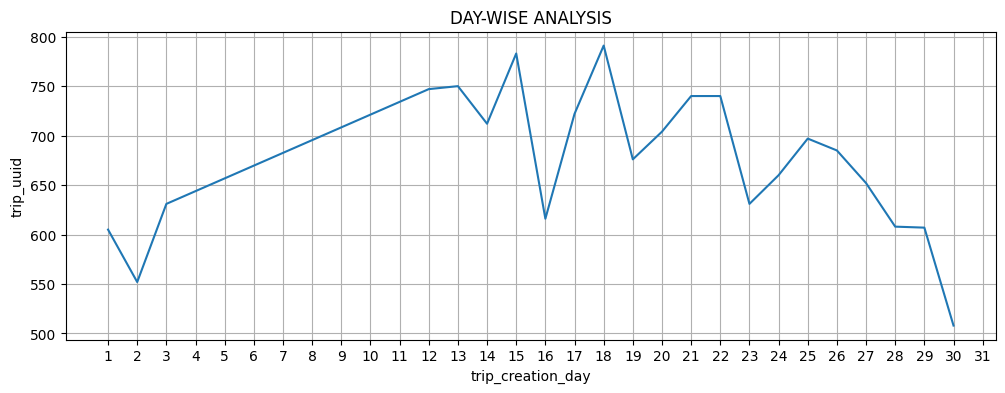

In [ ]:
plt.figure(figsize = (12, 4))
sns.lineplot(data = df_day,
             x = df_day['trip_creation_day'],
             y = df_day['trip_uuid'])
plt.xticks(np.arange(1, 32))
plt.title('DAY-WISE ANALYSIS')
plt.grid()


### INFERENCE:

Most trips are created in the **middle** of the month.


### ANALYSIS BASED ON WEEK

In [ ]:
df['trip_creation_week'].unique()


array([37, 38, 39, 40], dtype=int8)

In [ ]:
df_week = df.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week.head()


,trip_creation_week,trip_uuid
0,37,3608
1,38,5004
2,39,4417
3,40,1788


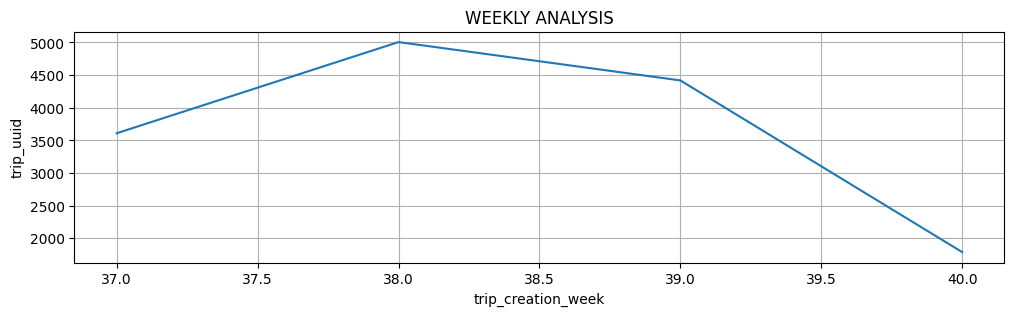

In [ ]:
plt.figure(figsize = (12, 3))
sns.lineplot(data = df_week,
             x = df_week['trip_creation_week'],
             y = df_week['trip_uuid'])
plt.title('WEEKLY ANALYSIS')
plt.grid()


### INFERENCE:

Maximum trips are created in the **38th** week

### ANALYSIS BASED ON THE HOURS OF THE DAY

In [ ]:
df['trip_creation_hour'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
df_hour = df.groupby(by = 'trip_creation_hour')['trip_uuid'].count().reset_index()
df_hour.head()


,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


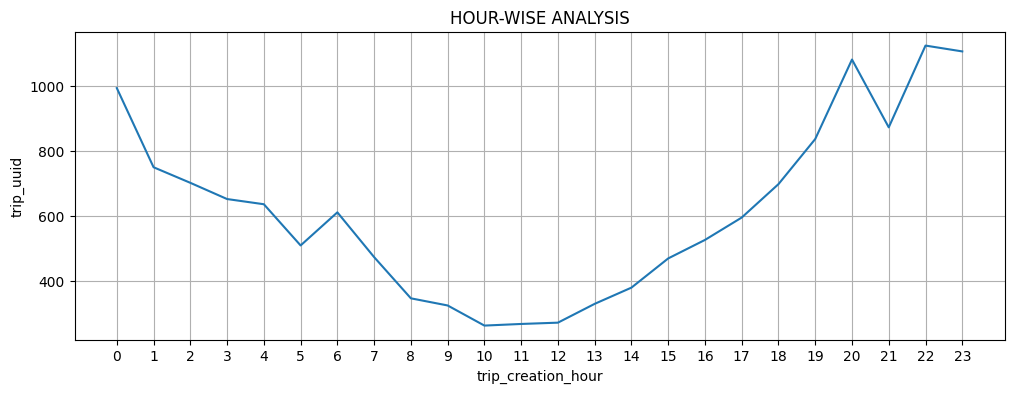

In [ ]:
plt.figure(figsize = (12, 4))
sns.lineplot(data = df_hour,
             x = df_hour['trip_creation_hour'],
             y = df_hour['trip_uuid'])
plt.xticks(np.arange(0,24))
plt.title('HOUR-WISE ANALYSIS')
plt.grid()



### INFERENCE:

1. During early hours of the day, the count is good

2. But after 5AM  till 12PM the count is reducing

3. After 1pm the count starts gradually increasing

4. Reaches **maximum** count on **10PM**

### ANALYSIS BASED ON TYPE OF DATA

In [ ]:
df_data = df.groupby('data')['trip_uuid'].count().reset_index()
df_data['percentage'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data.head()

,data,trip_uuid,percentage
0,test,4163,28.1
1,training,10654,71.9


[]

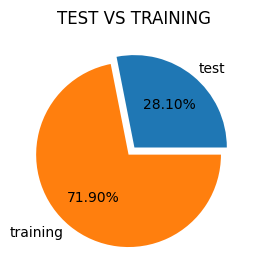

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(x = df_data['trip_uuid'],
        labels = df_data['data'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.title('TEST VS TRAINING')
plt.plot()


### INFERENCE:

**Training** data type has maximum trips

### ANALYSIS BASED ON ROUTE TYPE

In [ ]:
df_route = df.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['percentage'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()


,route_type,trip_uuid,percentage
0,Carting,8908,60.12
1,FTL,5909,39.88


[]

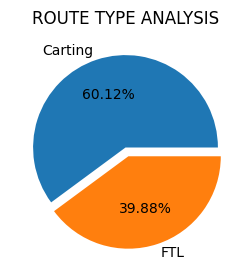

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(x = df_route['trip_uuid'],
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.title('ROUTE TYPE ANALYSIS')
plt.plot()


### INFERENCE:

**Carting** route type has maximum trips

### DISTRIBUTION OF NUMBER OF TRIPS CREATED IN DIFFERENT STATES

In [ ]:
df.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
trip_creation_time,14817,13451,22:08:55,5
source_name,14817,934,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,30,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,757,Bilaspur_HB,1063
destination_state,14817,32,Maharashtra,2561


In [ ]:
df_source_state = df.groupby('source_state')['trip_uuid'].count().reset_index()
df_source_state['percentage'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head(2)


,source_state,trip_uuid,percentage
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46


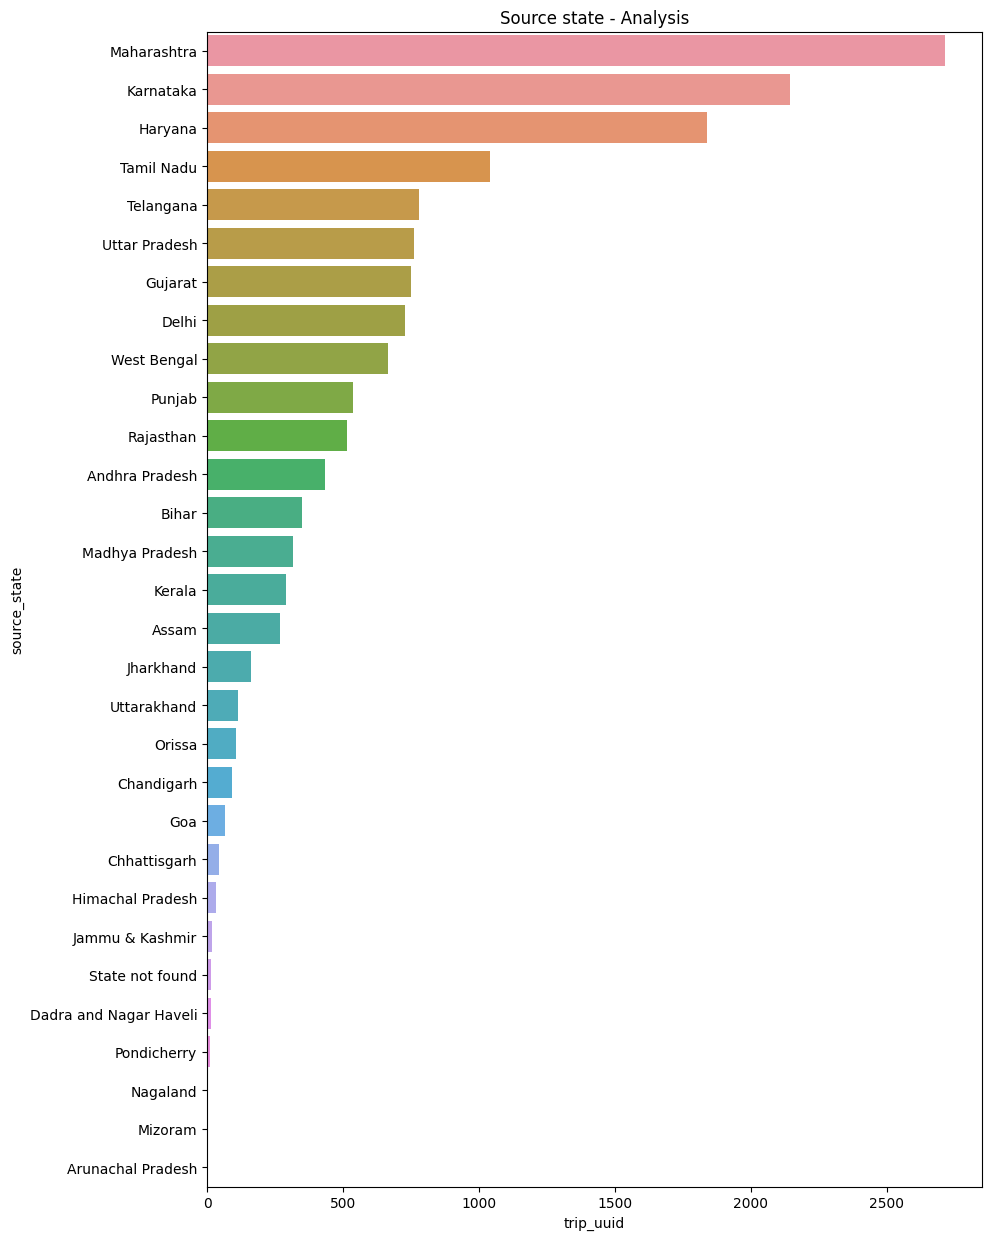

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'])
plt.title('Source state - Analysis')
plt.show()


### INFERENCE:

Maximum trips are originated from **Maharastra** followed by karnataka and Haryana

### Distribution of trips created in different cities

In [ ]:
df_source_city = df.groupby('source_city')['trip_uuid'].count().reset_index()
df_source_city['percentage'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city.head(2)

,source_city,trip_uuid,percentage
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86


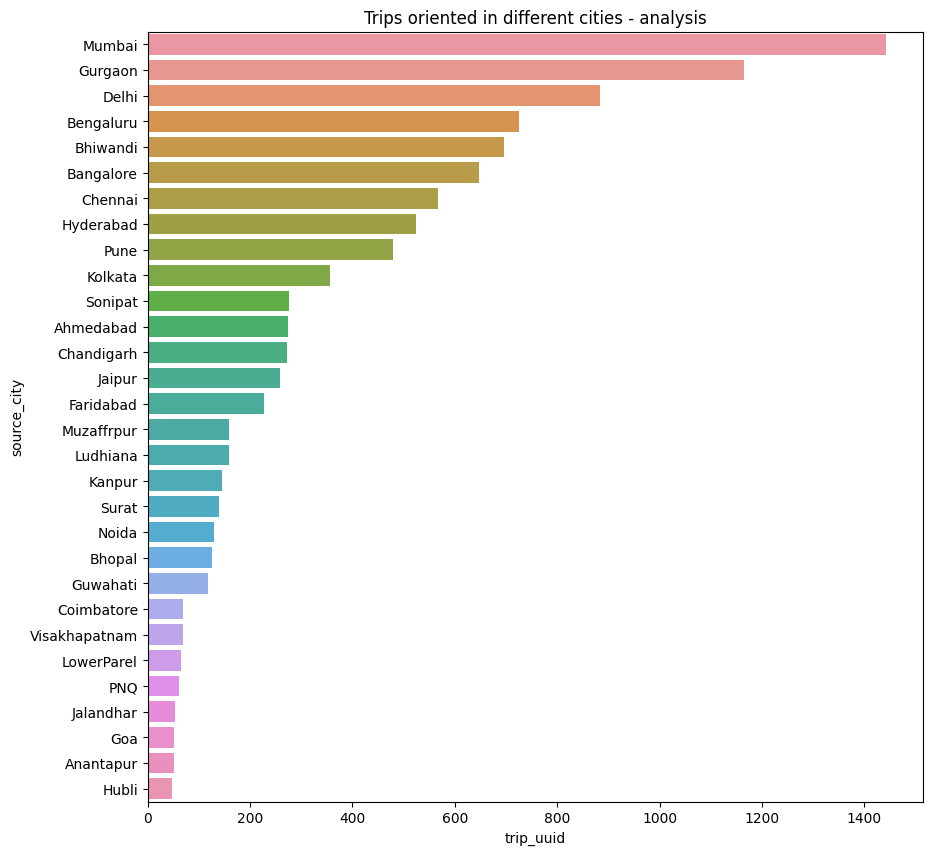

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'])
plt.title('Trips oriented in different cities - analysis')
plt.show()


### INFERENCE:

Most trips are originated in **Mumbai** followed by Gurgaon and Delhi

### Analysis based on the distribution of number of trips based on destination state

In [ ]:
df_destination_state = df.groupby('destination_state')['trip_uuid'].count().reset_index()
df_destination_state['percentage'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head(2)

,destination_state,trip_uuid,percentage
18,Maharashtra,2561,17.28
15,Karnataka,2294,15.48


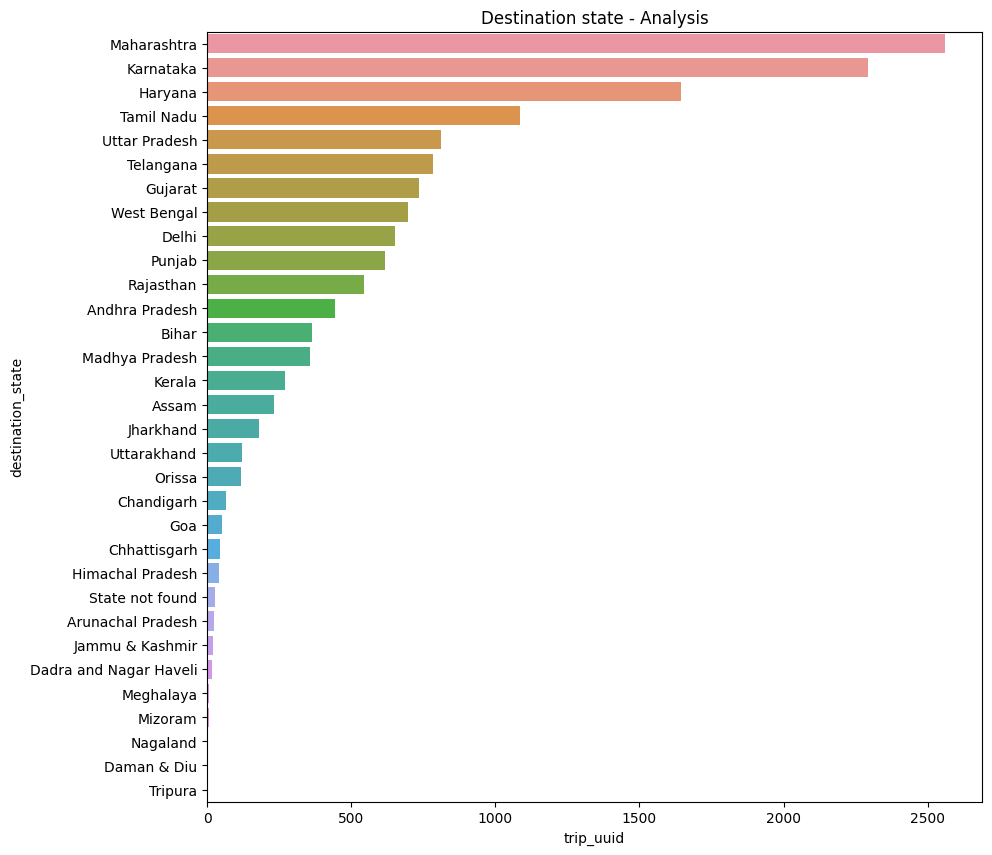

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'])
plt.title('Destination state - Analysis')
plt.show()


### INFERENCE:

Maximum trips are destined to **Maharastra**

### Analysis based on the distribution of number of trips based on destination cities

In [ ]:
df_destination_city = df.groupby('destination_city')['trip_uuid'].count().reset_index()
df_destination_city['percentage'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city.head(3)

,destination_city,trip_uuid,percentage
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32


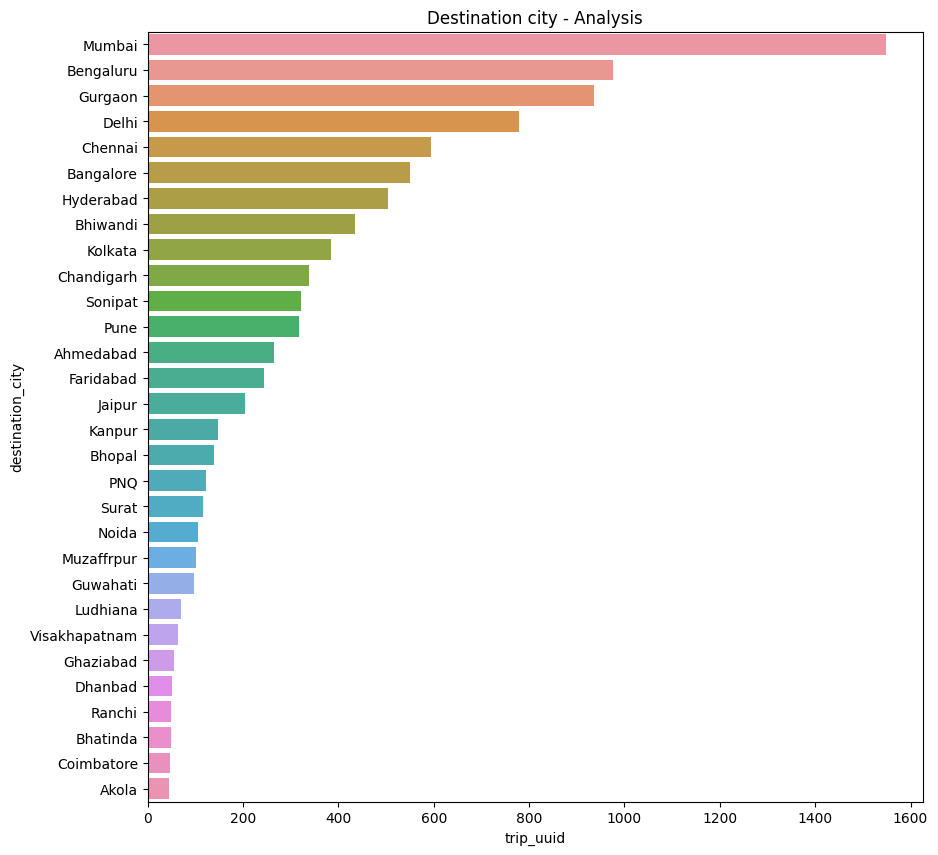

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city,
            x = df_destination_city['trip_uuid'],
            y = df_destination_city['destination_city'])
plt.title('Destination city - Analysis')
plt.show()


### INFERENCE:

maximum trips are destined to **Mumbai** city followed by Bengaluru and Gurgaon

## PAIRPLOT:

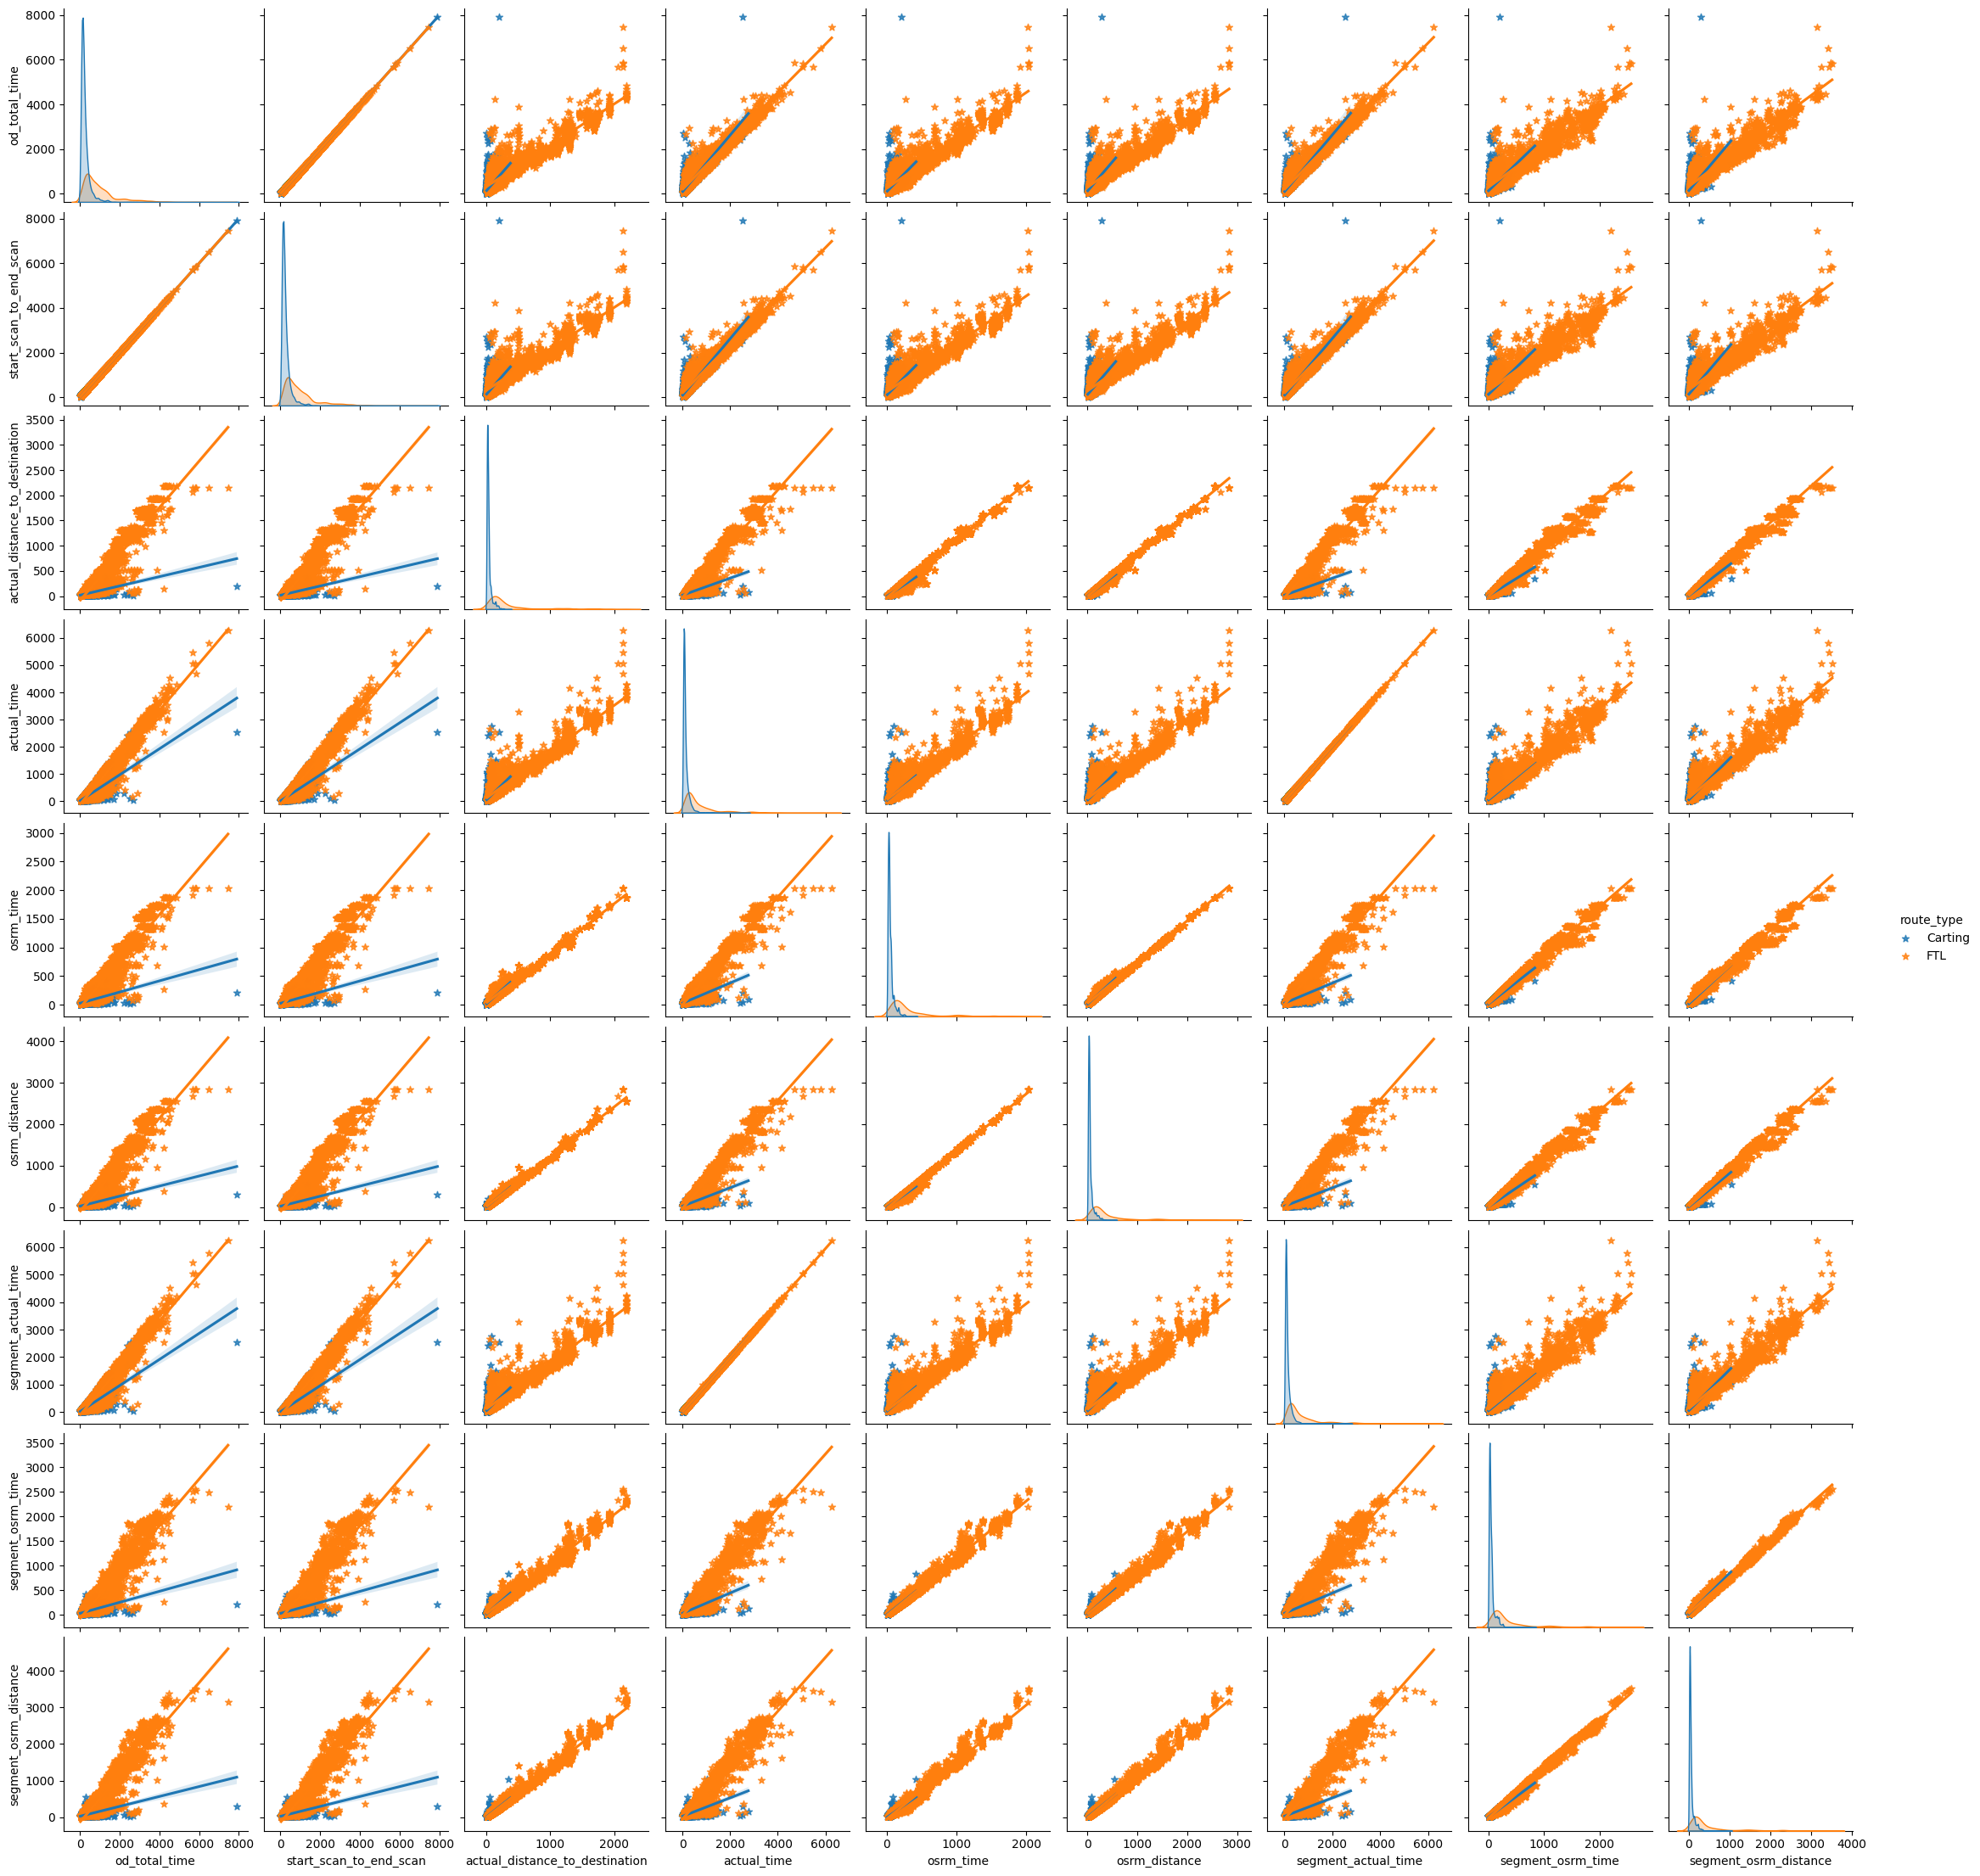

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = df,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '*')
plt.show()

In [ ]:
df_corr = df[numerical_columns].corr()
df_corr


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,1.000000,0.906263,0.954472,0.911194,0.911358,0.954458,0.904393,0.908119
start_scan_to_end_scan,1.000000,1.000000,0.906266,0.954473,0.911197,0.911361,0.954460,0.904397,0.908123
actual_distance_to_destination,0.906263,0.906266,1.000000,0.948995,0.994893,0.997217,0.947989,0.987161,0.992742
actual_time,0.954472,0.954473,0.948995,1.000000,0.953152,0.953845,0.999988,0.947958,0.952183
osrm_time,0.911194,0.911197,0.994893,0.953152,1.000000,0.998384,0.952218,0.992269,0.992677
osrm_distance,0.911358,0.911361,0.997217,0.953845,0.998384,1.000000,0.952905,0.990975,0.994311
segment_actual_time,0.954458,0.954460,0.947989,0.999988,0.952218,0.952905,1.000000,0.947032,0.951255
segment_osrm_time,0.904393,0.904397,0.987161,0.947958,0.992269,0.990975,0.947032,1.000000,0.996500
segment_osrm_distance,0.908119,0.908123,0.992742,0.952183,0.992677,0.994311,0.951255,0.996500,1.000000


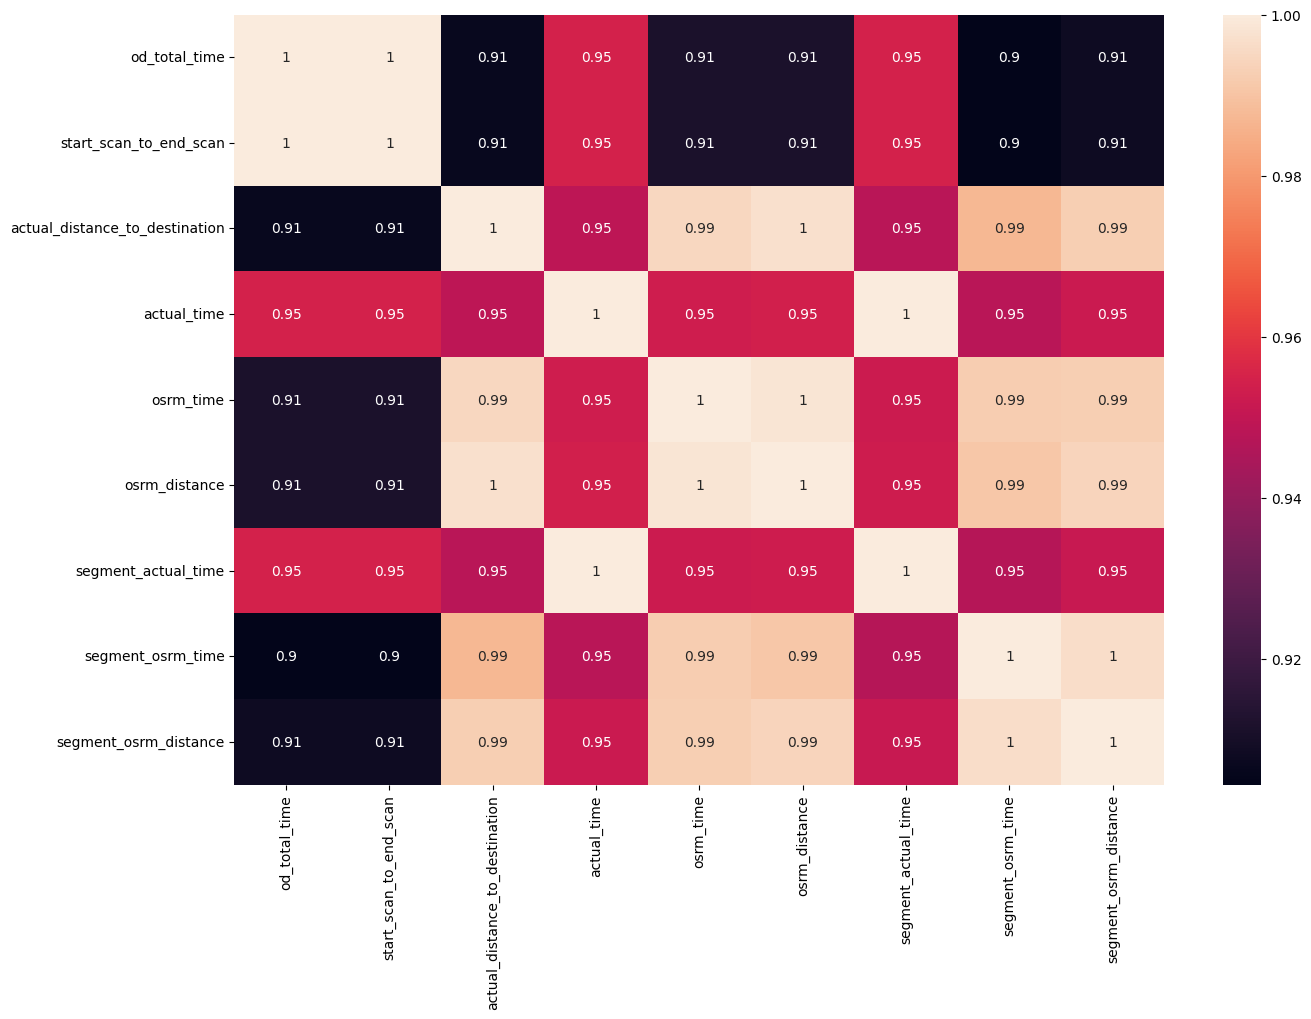

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, annot = True)
plt.show()


### INFERENCE:

Very High Correlation (> 0.9) exists between columns all the numerical columns specified above


##3. In-depth analysis and feature engineering:


### Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

***STEP-1*** : Set up Null Hypothesis

1. **Null Hypothesis ( H0 )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

2. **Alternate Hypothesis ( HA )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

--------------------------------------------------------------------------------

***STEP-2*** : Checking for basic assumpitons for the hypothesis

Distribution check using **QQ Plot**

Homogeneity of Variances using **Lavene's test**

--------------------------------------------------------------------------------

***STEP-3***: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

--------------------------------------------------------------------------------

***STEP-4***: Compute the p-value and fix value of alpha.

We set our ***alpha to be 0.05***

--------------------------------------------------------------------------------

***STEP-5***: Compare p-value and alpha.

Based on p-value, we will reject or fail to reject H0.

**p-val < alpha** : Reject H0

**p-val > alpha** : Fail to reject H0

--------------------------------------------------------------------------------



In [ ]:
df[['od_total_time', 'start_scan_to_end_scan']].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.46,149.93,280.77,638.2,7898.55
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.00,149.00,280.00,637.0,7898.00


#### KDE PLOT:

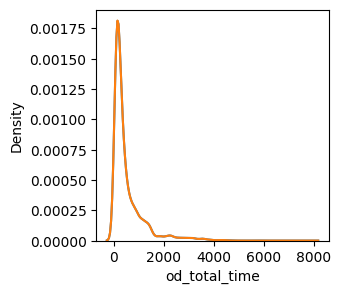

In [ ]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['od_total_time'])
sns.kdeplot(df['start_scan_to_end_scan'])
plt.show()

INFERENCE:

The **kdeplot** vividly shows that the graphs of both the groups are the  **same distribution** and they have **almost same mean.** so ttest is performed.


#### TTEST:

In [ ]:
# H0 - od_total_time and start_scan_to_end_scan are similar
# Ha - od_total_time and start_scan_to_end_scan are different

test_stat, p_value = spy.ttest_ind(df['od_total_time'],df['start_scan_to_end_scan'])

print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - od_total_time and start_scan_to_end_scan are different')

else:
  print('FAIL TO REJECT H0 - od_total_time and start_scan_to_end_scan are similar')

P-value : 0.9076773879740099
FAIL TO REJECT H0 - od_total_time and start_scan_to_end_scan are similar


Visual Tests to know if the samples follow normal distribution


#### QQPLOT:

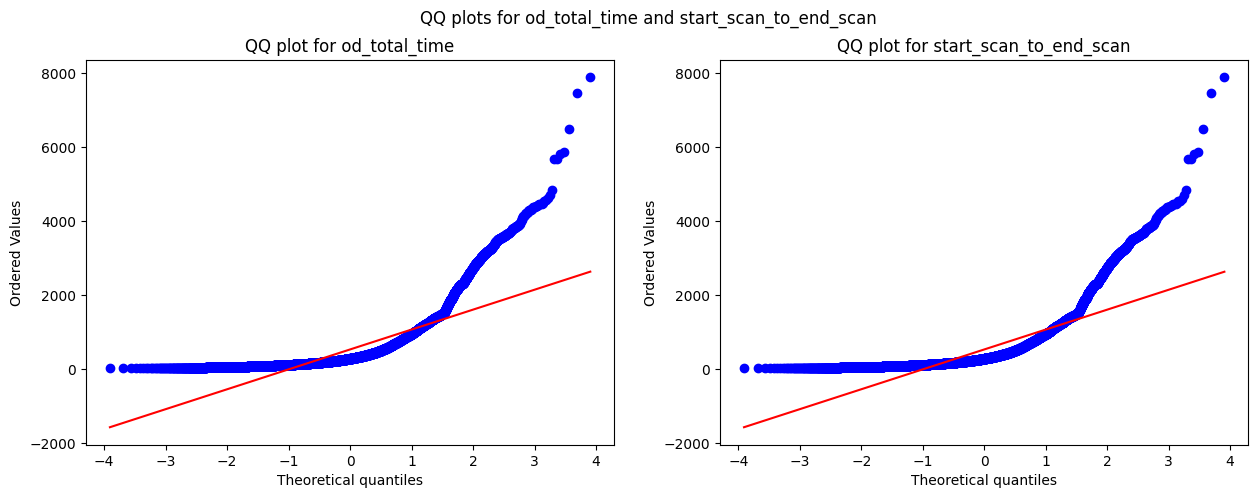

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.show()


It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution

Ha : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality



#### SHAPIRO-WILK TEST:

In [ ]:
test_stat, p_value = shapiro(df['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


#### KS test for normality

In [ ]:
test_stat, p_value = kstest(df['od_total_time'].sample(5000),spy.norm.cdf)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = kstest(df['start_scan_to_end_scan'].sample(5000),spy.norm.cdf)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.


#### BOXCOX TRANSFORMATION:

In [ ]:
transformed_od_total_time = spy.boxcox(df['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 7.172770042757021e-25
REJECT H0 -The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_start_scan_to_end_scan = spy.boxcox(df['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 1.0471322892609475e-24
REJECT H0 -The sample does not follow normal distribution


For all the test, the sample doesnt follow Gaussian distribution


Homogeneity of Variances using Lavene's test

#### LAVENE'S TEST:

In [ ]:
# H0 - Homogenous Variance

# HA - Non Homogenous Variance

test_stat, p_value = spy.levene(df['od_total_time'], df['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The samples do not have  Homogenous Variance')
else:
    print('FAIL TO REJECT H0 - The samples have Homogenous Variance ')

p-value 0.9668007217581142
FAIL TO REJECT H0 - The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., **Mann-Whitney U rank** test for two independent samples.


#### Mann-Whitney U rank test:

In [ ]:
# H0 - od_total_time and start_scan_to_end_scan are similar
# Ha - od_total_time and start_scan_to_end_scan are different


test_stat, p_value = spy.mannwhitneyu(df['od_total_time'], df['start_scan_to_end_scan'])
print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - od_total_time and start_scan_to_end_scan are different')

else:
  print('FAIL TO REJECT H0 - od_total_time and start_scan_to_end_scan are similar')

P-value : 0.7815123224221716
FAIL TO REJECT H0 - od_total_time and start_scan_to_end_scan are similar


#### INFERENCE:

od_total_time and start_scan_to_end_scan are **similar**

### Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [ ]:
df[['actual_time', 'osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14817.0,357.143754,561.396157,9.0,67.0,149.0,370.0,6265.0
osrm_time,14817.0,161.384018,271.360995,6.0,29.0,60.0,168.0,2032.0


#### KDEPLOT:

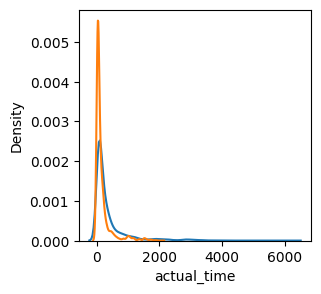

In [ ]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['actual_time'])
sns.kdeplot(df['osrm_time'])
plt.show()

INFERRENCE:

The **kdeplot** vividly shows that the graphs of both the groups are almost the  **same distribution** and they have **almost same mean.** so ttest is performed.


#### TTEST-IND:

In [ ]:
# H0 - actual_time and osrm_time are similar
# Ha - actual_time and osrm_time are different

test_stat, p_value = spy.ttest_ind(df['actual_time'],df['osrm_time'])

print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - actual_time and osrm_time are different')

else:
  print('FAIL TO REJECT H0 - actual_time and osrm_time are similar')

P-value : 0.0
REJECT H0 - actual_time and osrm_time are different


Visual Tests to know if the samples follow normal distribution

#### HISTPLOT:

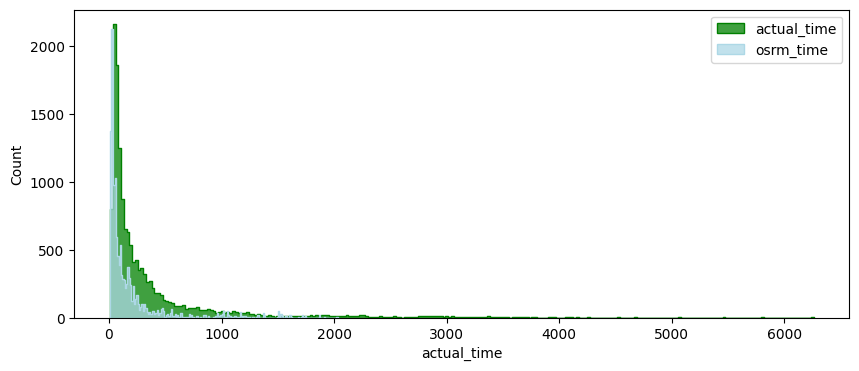

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(df['actual_time'], element = 'step', color = 'green')
sns.histplot(df['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.show()


#### QQ Plot:

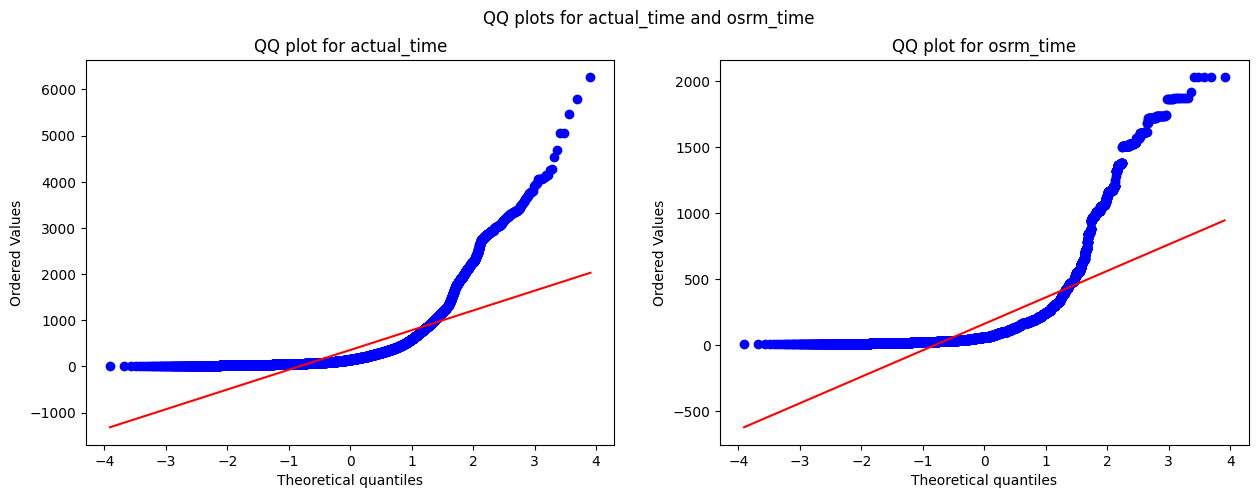

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.show()


#### Shapiro-Wilk test:

In [ ]:
test_stat, p_value = shapiro(df['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


#### BOXCOX TRANSFORMATION:

In [ ]:
transformed_actual_time = spy.boxcox(df['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 1.021792743086169e-28
REJECT H0 -The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_osrm_time = spy.boxcox(df['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 -The sample follows normal distribution')

p-value 3.543600614978861e-35
REJECT H0 -The sample does not follow normal distribution


#### Lavene's test:


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df['actual_time'], df['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871297993683208e-220
The samples do not have  Homogenous Variance


Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.


#### Mann-Whitney U rank test:

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df['actual_time'], df['osrm_time'])
print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
  print('REJECT H0 - actual_time and osrm_time are different')

else:
  print('FAIL TO REJECT H0 - actual_time and osrm_time are similar')

p-value 0.0
REJECT H0 - actual_time and osrm_time are different


#### INFERENCE:

actual_time and osrm_time are **different**

### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
df[['actual_time', 'segment_actual_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14817.0,357.143754,561.396157,9.0,67.0,149.0,370.0,6265.0
segment_actual_time,14817.0,353.892286,556.247965,9.0,66.0,147.0,367.0,6230.0


#### KDE PLOT:

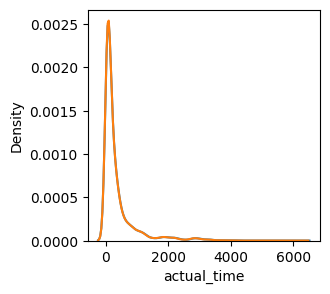

In [ ]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['actual_time'])
sns.kdeplot(df['segment_actual_time'])
plt.show()

INFERRENCE:

The **kdeplot** vividly shows that the graphs of both the groups are the  **same distribution** and they have **almost same mean.** so ttest is performed.


#### TTEST:

In [ ]:
# H0 - actual_time and segment_actual_time are similar
# Ha - actual_time and segment_actual_time are different

test_stat, p_value = spy.ttest_ind(df['actual_time'],df['segment_actual_time'])

print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - actual_time and segment_actual_time are different')

else:
  print('FAIL TO REJECT H0 - actual_time and segment_actual_time are similar')

P-value : 0.6165138648224772
FAIL TO REJECT H0 - actual_time and segment_actual_time are similar


#### QQ Plot:


[]

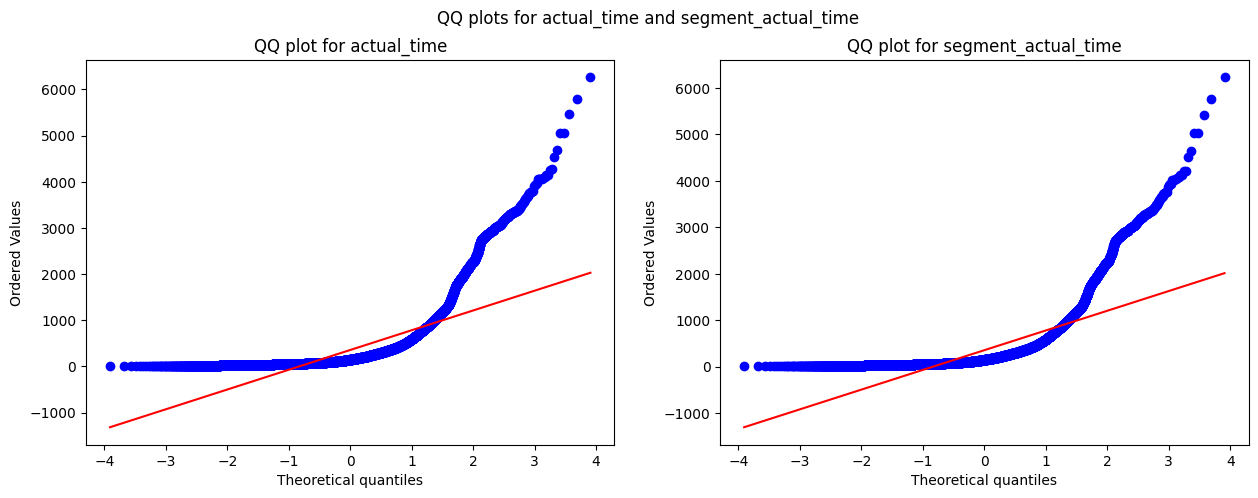

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()


#### Shapiro-Wilk test:

In [ ]:
test_stat, p_value = spy.shapiro(df['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


#### BOXCOX TRANSFORMATION:

In [ ]:
transformed_actual_time = spy.boxcox(df['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 1.021792743086169e-28
REJECT H0 -The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_segment_actual_time = spy.boxcox(df['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 5.696120172016859e-29
REJECT H0 -The sample does not follow normal distribution


#### LAVENE'S test:

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df['actual_time'], df['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6955022668700895
The samples have Homogenous Variance 


Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.


#### Mann-Whitney U rank test:

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df['actual_time'], df['segment_actual_time'])
print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
  print('REJECT H0 - actual_time and segment_actual_time are different')

else:
  print('FAIL TO REJECT H0 - actual_time and segment_actual_time are similar')

p-value 0.4164235159622476
FAIL TO REJECT H0 - actual_time and segment_actual_time are similar


#### INFERENCE:

actual_time and segment_actual_time  are **similar**

### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [ ]:
df[['osrm_distance', 'segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14817.0,204.344689,370.395573,9.0729,30.8192,65.6188,208.4750,2840.0810
segment_osrm_distance,14817.0,223.201161,416.628374,9.0729,32.6545,70.1544,218.8024,3523.6324


#### KDE PLOT:

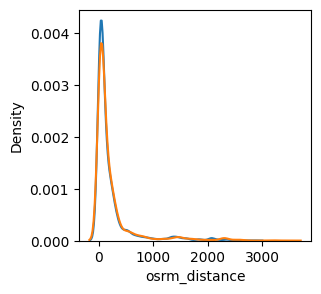

In [ ]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['osrm_distance'])
sns.kdeplot(df['segment_osrm_distance'])
plt.show()

#### TTEST:

In [ ]:
# H0 - osrm_distance and segment_osrm_distance are similar
# Ha - osrm_distance and segment_osrm_distance are different

test_stat, p_value = spy.ttest_ind(df['osrm_distance'],df['segment_osrm_distance'])

print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - osrm_distance and segment_osrm_distance are different')

else:
  print('FAIL TO REJECT H0 - osrm_distance and segment_osrm_distance are similar')

P-value : 3.842631473353718e-05
REJECT H0 - osrm_distance and segment_osrm_distance are different


#### QQ Plot:


[]

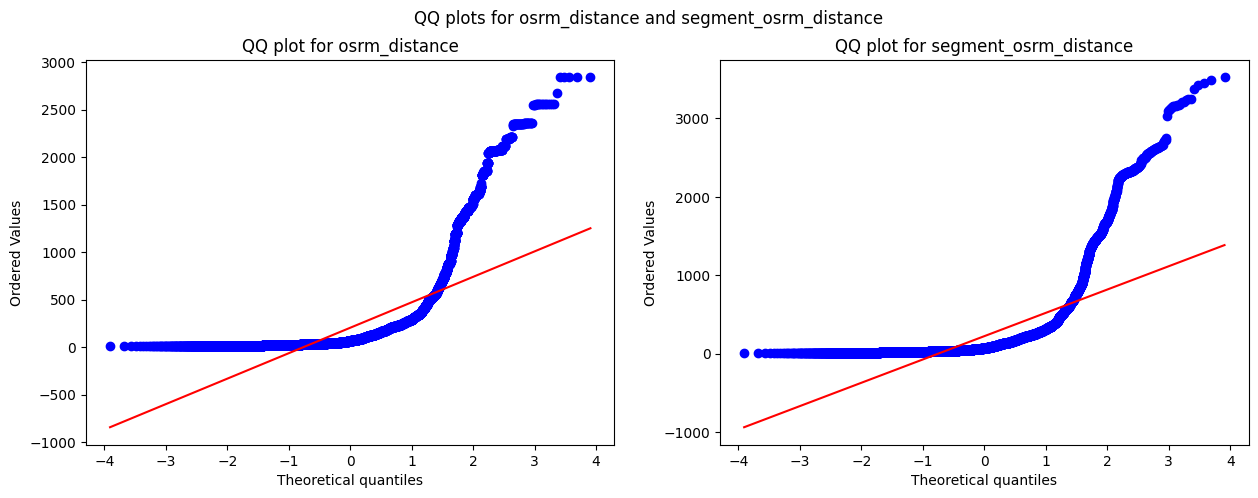

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

#### Shapiro-Wilk test:


In [ ]:
test_stat, p_value = spy.shapiro(df['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


#### BOXCOX TRANSFORMATION:


In [ ]:
transformed_osrm_distance = spy.boxcox(df['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 7.114532433223529e-41
REJECT H0 -The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_distance = spy.boxcox(df['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 3.0623432935550394e-38
REJECT H0 -The sample does not follow normal distribution


#### LAVENE'S TEST:

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df['osrm_distance'], df['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976354422600578
The samples do not have  Homogenous Variance


#### Mann-Whitney U rank test:


In [ ]:
test_stat, p_value = spy.mannwhitneyu(df['osrm_distance'], df['segment_osrm_distance'])
print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
  print('REJECT H0 - osrm_distance and segment_osrm_distance are different')

else:
  print('FAIL TO REJECT H0 - osrm_distance and segment_osrm_distance are similar')

p-value 9.511383588276375e-07
REJECT H0 - osrm_distance and segment_osrm_distance are different


#### INFERENCE:

osrm_distance and segment_osrm_distance  are **different**

### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [ ]:
df[['osrm_time', 'segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,161.384018,271.360995,6.0,29.0,60.0,168.0,2032.0
segment_osrm_time,14817.0,180.949787,314.542047,6.0,31.0,65.0,185.0,2564.0


#### KDE PLOT:

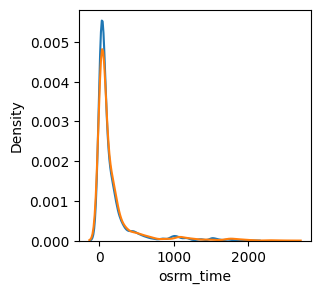

In [ ]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['osrm_time'])
sns.kdeplot(df['segment_osrm_time'])
plt.show()

#### TTEST:

In [ ]:
# H0 - osrm_time and segment_osrm_time are similar
# Ha - osrm_time and segment_osrm_time are different

test_stat, p_value = spy.ttest_ind(df['osrm_time'],df['segment_osrm_time'])

print('P-value :',p_value)
alpha = 0.05

if p_value < alpha:
  print('REJECT H0 - osrm_time and segment_osrm_time are different')

else:
  print('FAIL TO REJECT H0 - osrm_time and segment_osrm_time are similar')

P-value : 9.956426798219171e-09
REJECT H0 - osrm_time and segment_osrm_time are different


#### QQ Plot:


[]

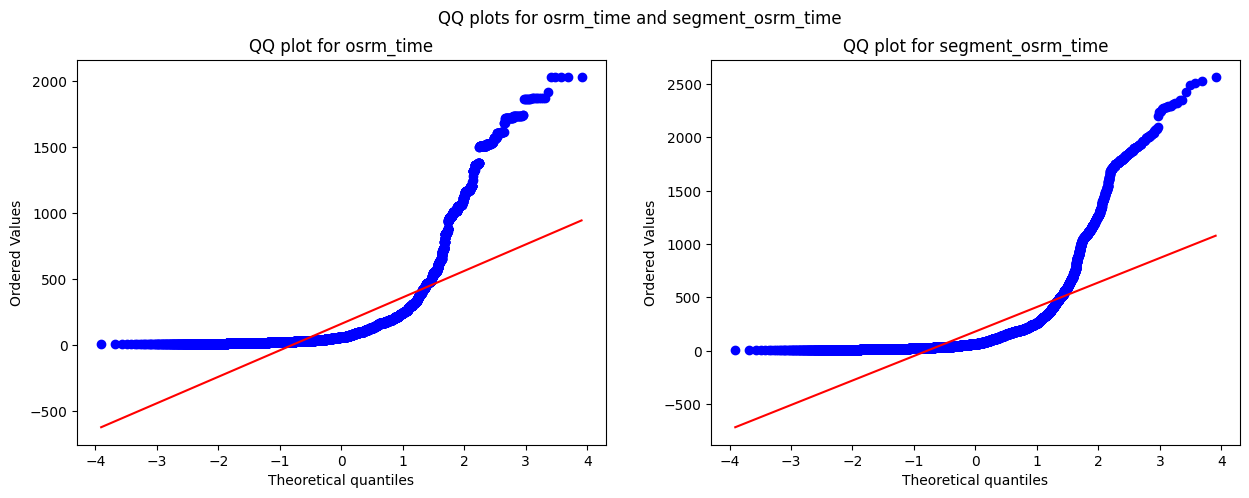

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

#### Shapiro-Wilk test:


In [ ]:
test_stat, p_value = spy.shapiro(df['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 - The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 0.0
REJECT H0 - The sample does not follow normal distribution


#### BOXCOX TRANSFORMATION:


In [ ]:
transformed_osrm_time = spy.boxcox(df['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 3.543600614978861e-35
REJECT H0 -The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_time = spy.boxcox(df['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('REJECT H0 -The sample does not follow normal distribution')
else:
    print('FAIL TO REJECT H0 - The sample follows normal distribution')

p-value 4.893250997154572e-34
REJECT H0 -The sample does not follow normal distribution


#### LAVENE'S TEST:


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349482669010088e-08
The samples do not have  Homogenous Variance


#### Mann-Whitney U rank test:


In [ ]:
test_stat, p_value = spy.mannwhitneyu(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
  print('REJECT H0 - osrm_time and segment_osrm_time are different')

else:
  print('FAIL TO REJECT H0 - osrm_time and segment_osrm_time are similar')

p-value 2.2995370859748865e-08
REJECT H0 - osrm_time and segment_osrm_time are different


#### INFERENCE:

osrm_time and segment_osrm_time  are **different**

### Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis


In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400


#### HISTPLOT:

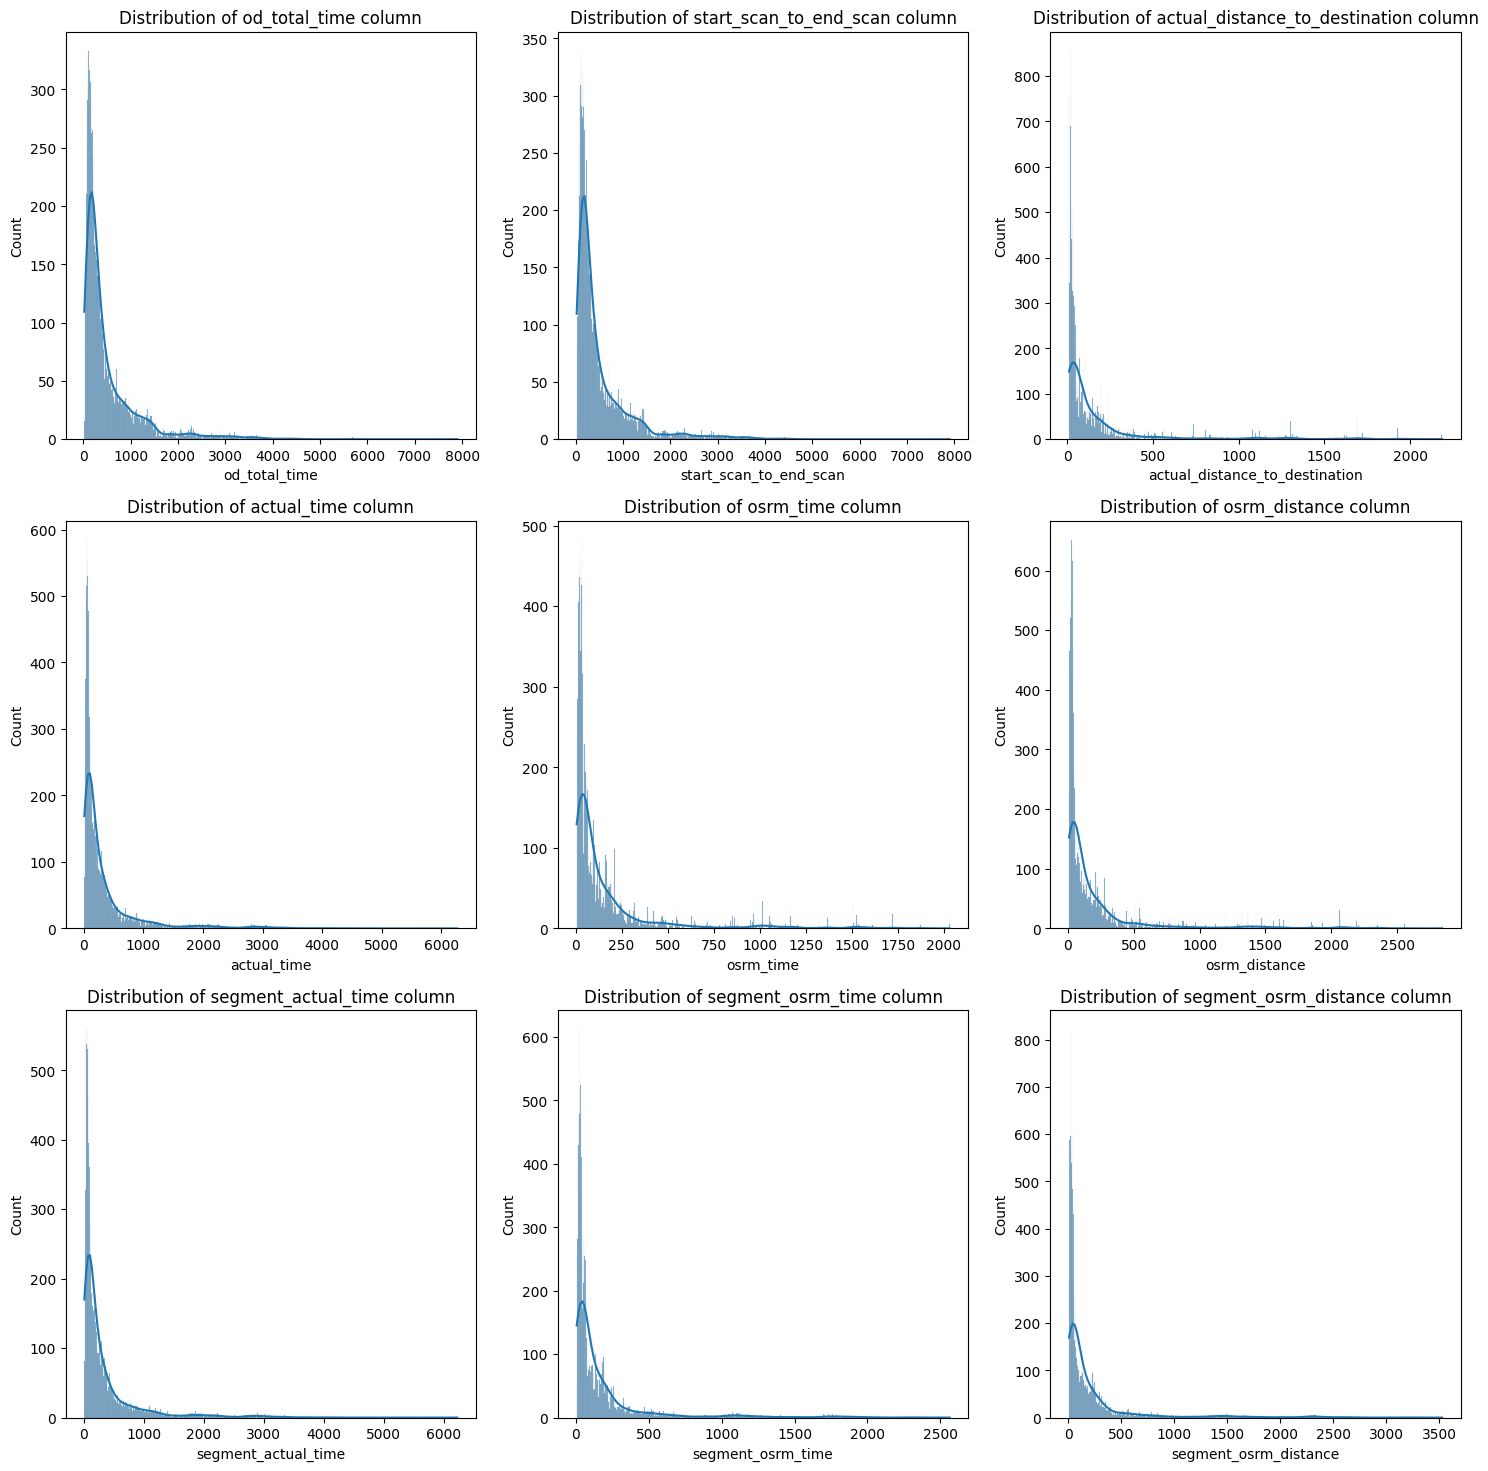

In [ ]:
plt.figure(figsize = (18,18))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[numerical_columns[i]], bins = 1000, kde = True)
    plt.title(f"Distribution of {numerical_columns[i]} column")
plt.show()

#### INFERENCE:

It can be inferred from the above plots that data in all the numerical columns are **right skewed.**


#### BOX PLOT:

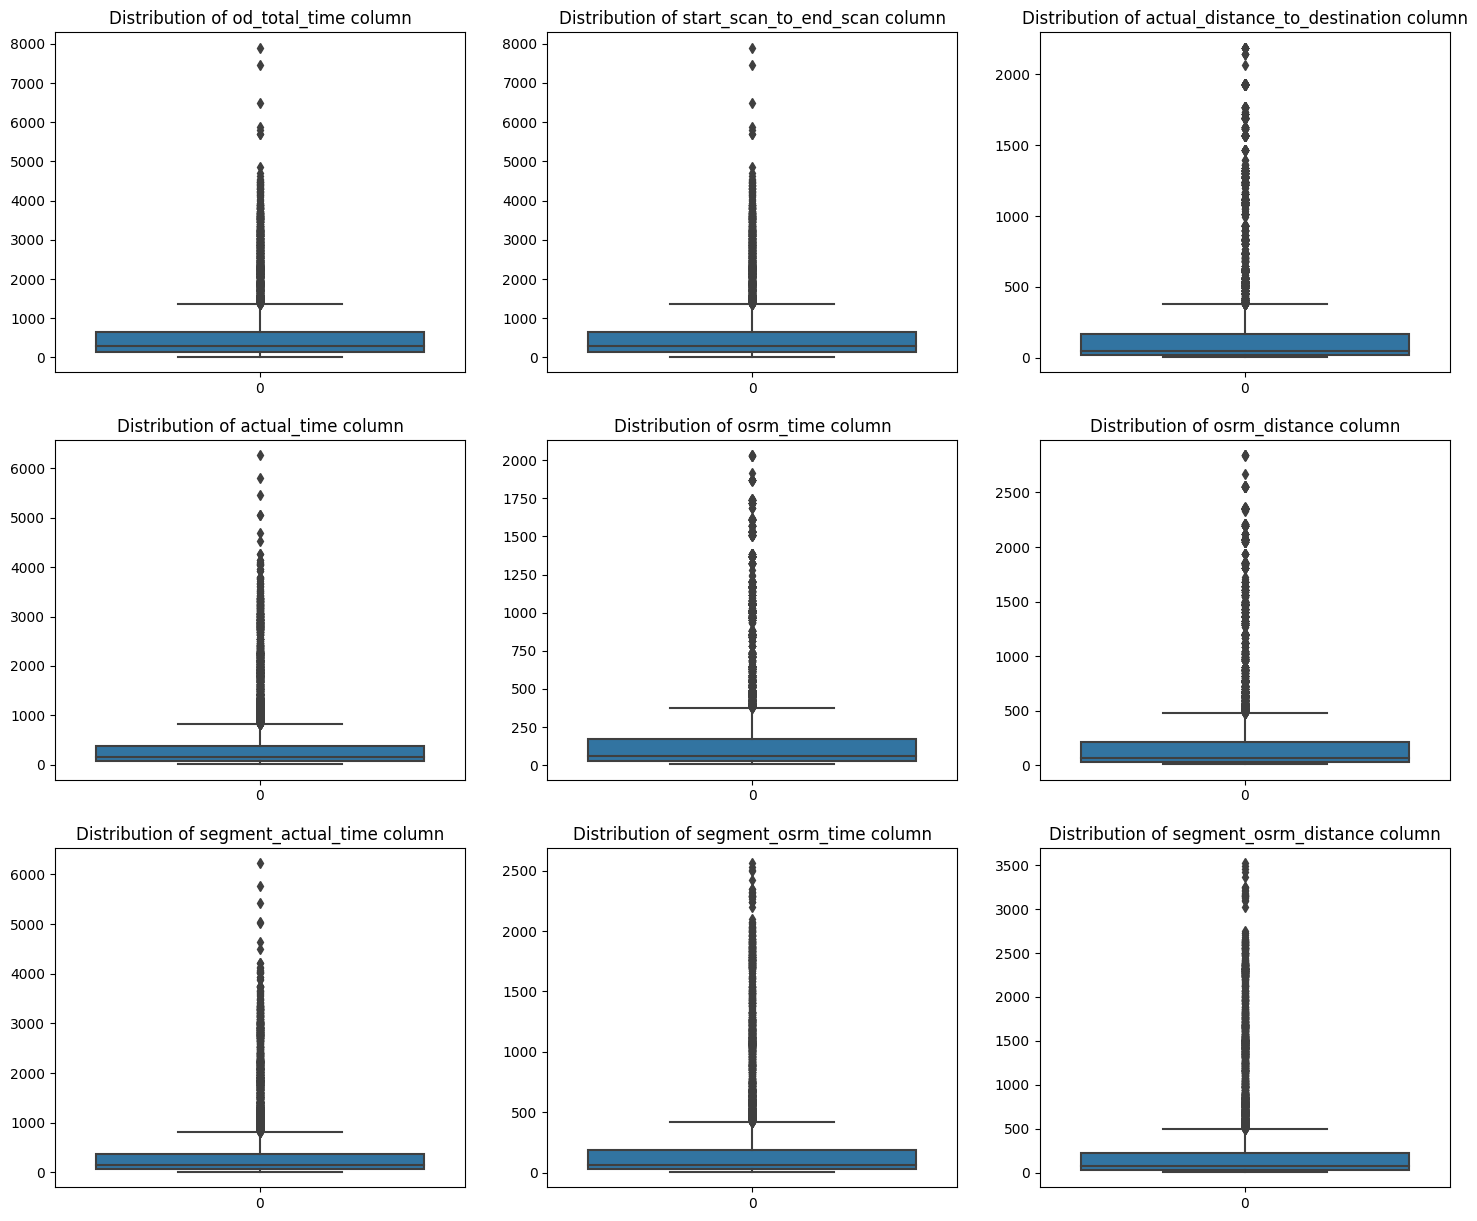

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[numerical_columns[i]])
    plt.title(f"Distribution of {numerical_columns[i]} column")
plt.show()

#### INFERENCE:

It can be clearly seen in the above plots that there are outliers in all the numerical columns that needs to be treated.

#### Detecting Outliers:

In [ ]:

for i in numerical_columns:
    Q1 = np.quantile(df[i], 0.25)
    Q3 = np.quantile(df[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df.loc[(df[i] < LB) | (df[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.83723905859321
Q3 : 164.58320763841138
IQR : 141.74596857981817
LB : -189.78171381113404
UB : 377.2021605081386
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.8192
Q3 : 208.475
IQR : 177.6558
LB : -235.6645
UB : 474.9587
Number of outliers : 1524
----------------------------------
Column : segment_actual_time
Q

#### INFERENCE:

The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in the dataset.


### Do one-hot encoding of categorical variables


In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64

Columns with 2 unique values can be encoded. Here, its only data and route type columns.

#### Route type

In [ ]:
# Get value counts before one-hot encoding

df['route_type'].value_counts()


Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [ ]:
# Perform one-hot encoding on categorical column route type

label_encoder = LabelEncoder()
df['route_type'] = label_encoder.fit_transform(df['route_type'])



In [ ]:
# Get value counts after one-hot encoding

df['route_type'].value_counts()


0    8908
1    5909
Name: route_type, dtype: int64

#### DATA TYPE:


In [ ]:
# Get value counts of categorical variable 'data' before one-hot encoding

df['data'].value_counts()


training    10654
test         4163
Name: data, dtype: int64

In [ ]:
# Perform one-hot encoding on categorical variable 'data'

label_encoder = LabelEncoder()
df['data'] = label_encoder.fit_transform(df['data'])

In [ ]:
# Get value counts after one-hot encoding

df['data'].value_counts()


1    10654
0     4163
Name: data, dtype: int64

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


[]

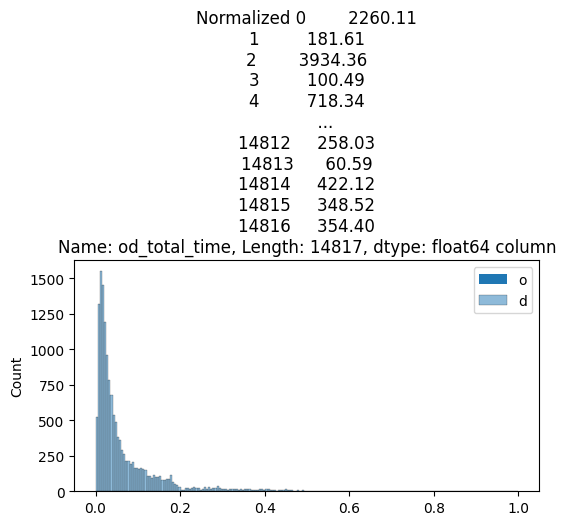

In [ ]:
plt.figure(figsize = (6, 3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()


[]

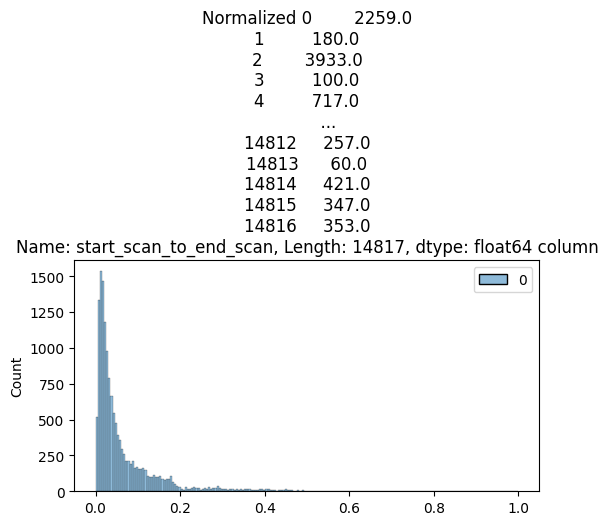

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['start_scan_to_end_scan']} column")
plt.plot()

[]

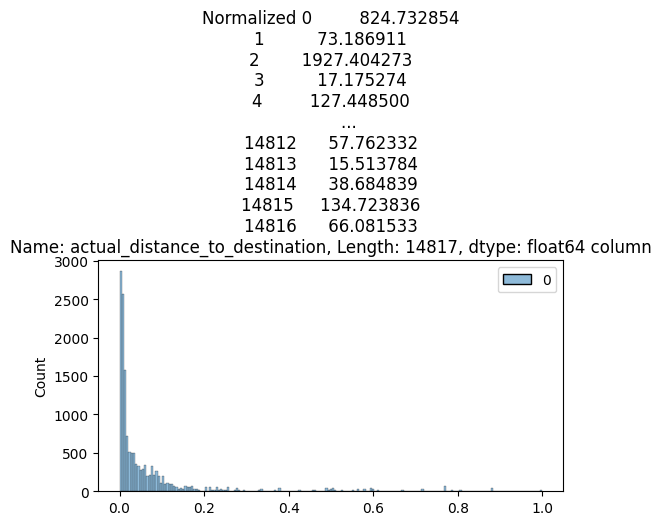

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['actual_distance_to_destination']} column")
plt.plot()

[]

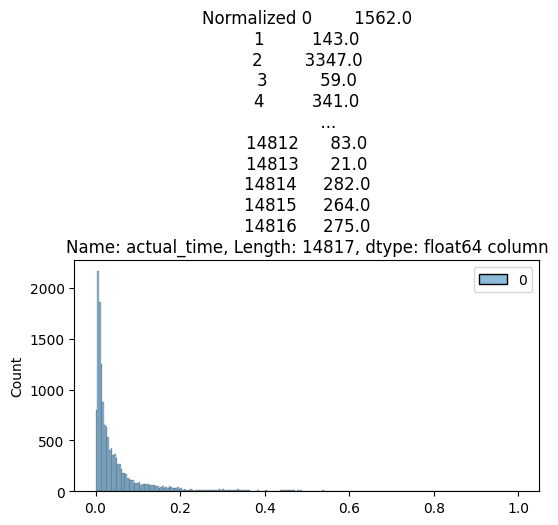

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['actual_time']} column")
plt.plot()

[]

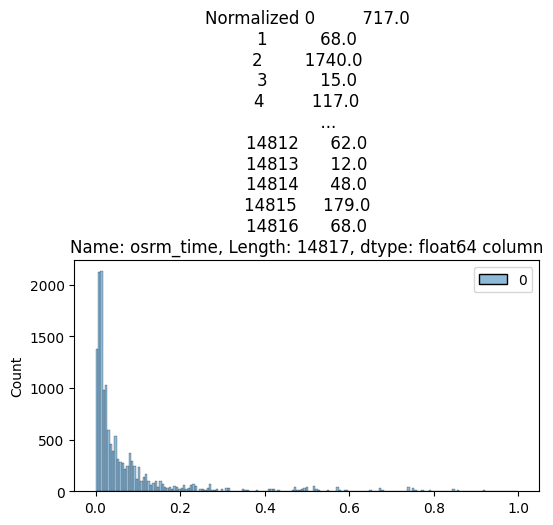

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['osrm_time']} column")
plt.plot()

[]

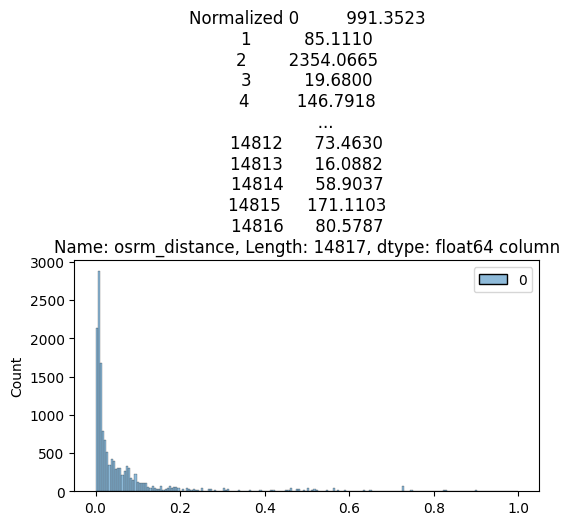

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['osrm_distance']} column")
plt.plot()



[]

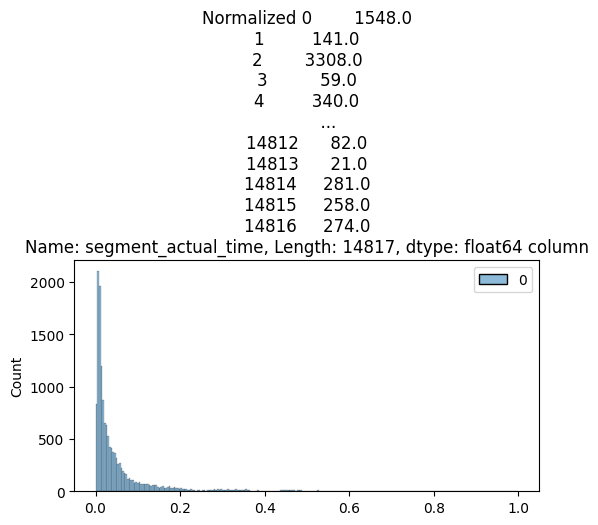

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_actual_time']} column")
plt.plot()

[]

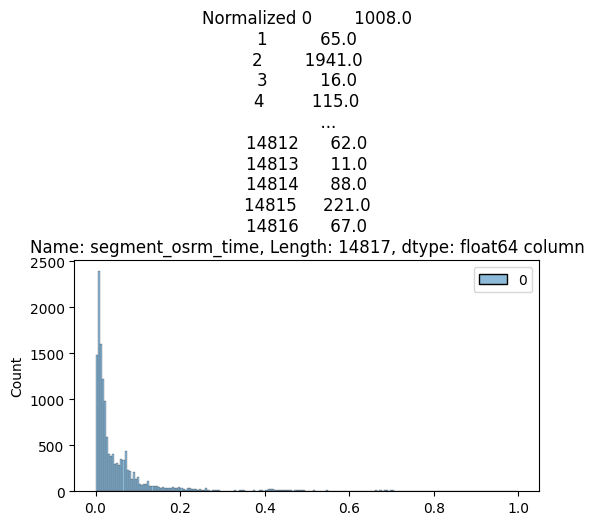

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_osrm_time']} column")
plt.plot()

[]

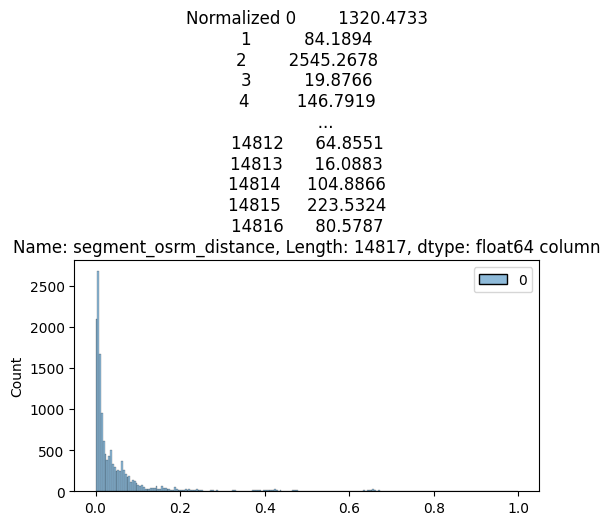

In [ ]:
plt.figure(figsize = (6,3))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_osrm_distance']} column")
plt.plot()

### Column Standardization

[]

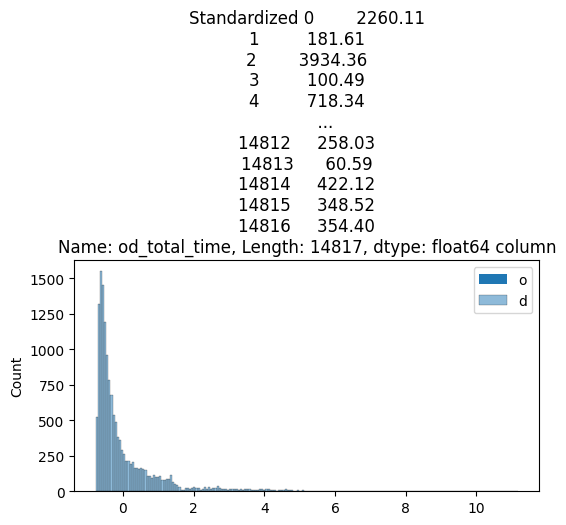

In [ ]:
plt.figure(figsize = (6,3))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()


[]

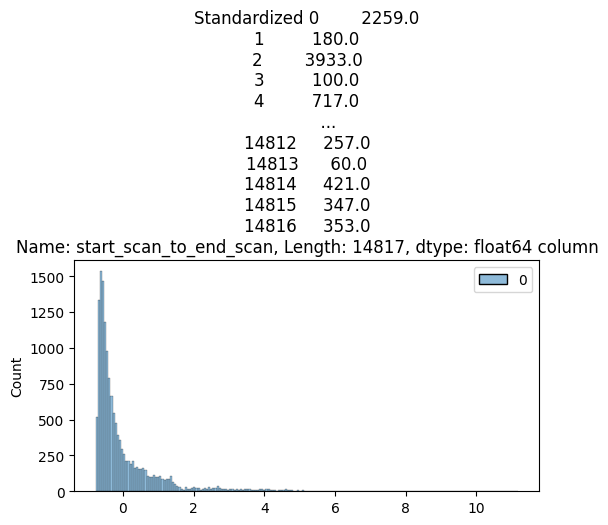

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['start_scan_to_end_scan']} column")
plt.plot()

[]

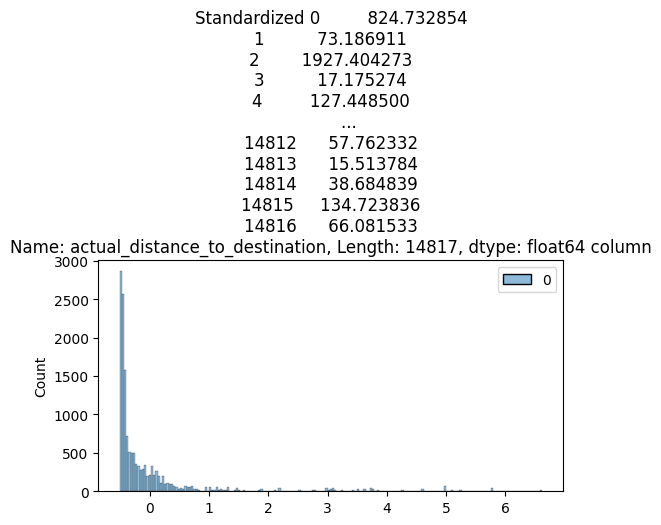

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['actual_distance_to_destination']} column")
plt.plot()

[]

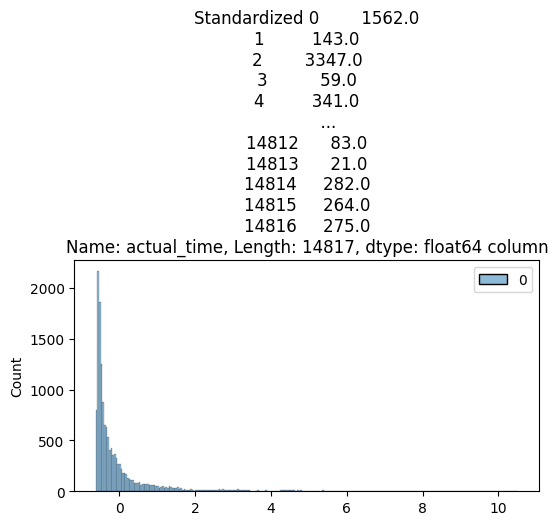

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['actual_time']} column")
plt.plot()

[]

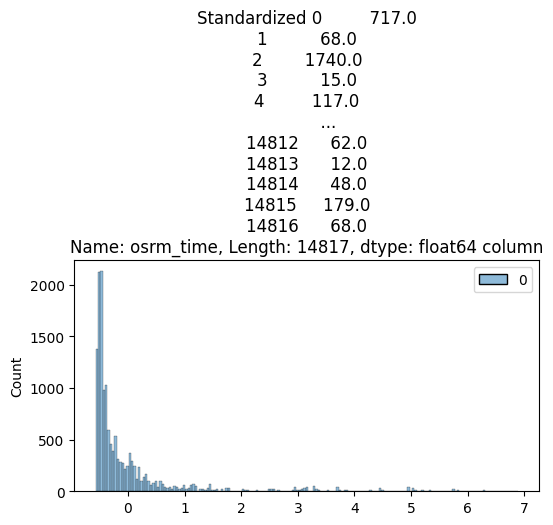

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['osrm_time']} column")
plt.plot()

[]

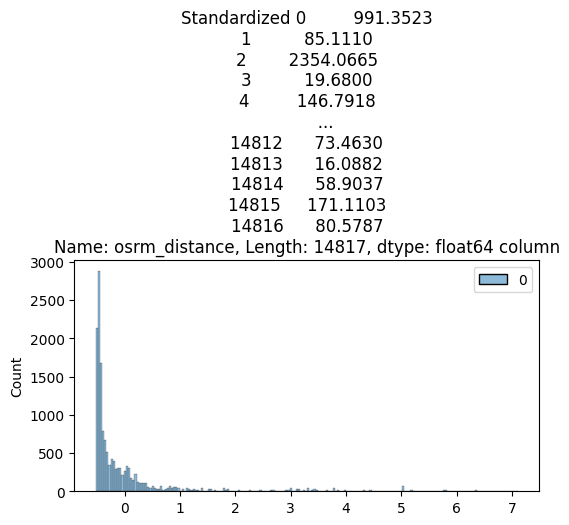

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['osrm_distance']} column")
plt.plot()

[]

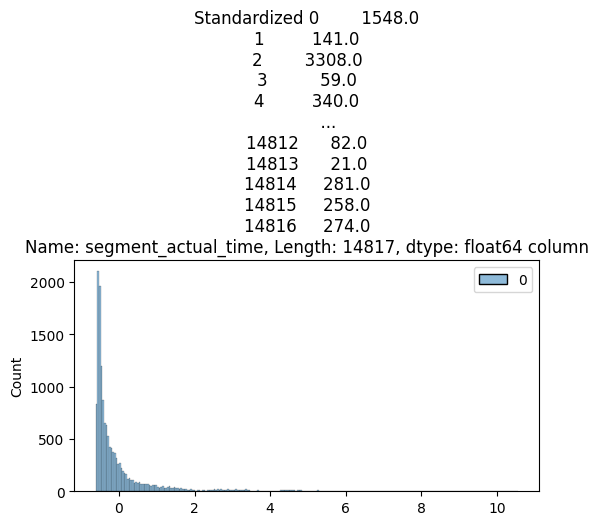

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_actual_time']} column")
plt.plot()

[]

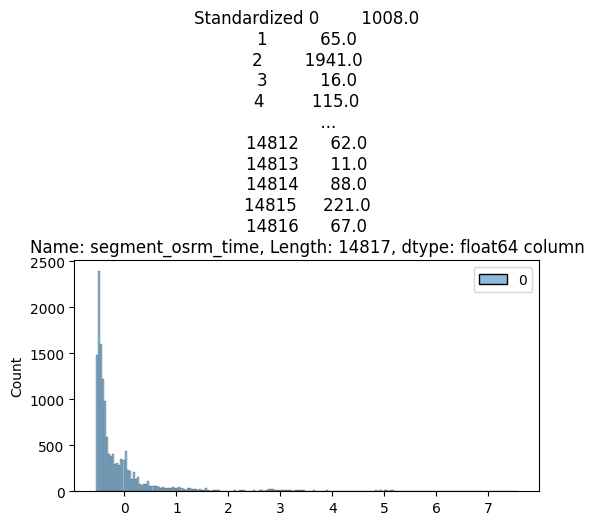

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_osrm_time']} column")
plt.plot()


[]

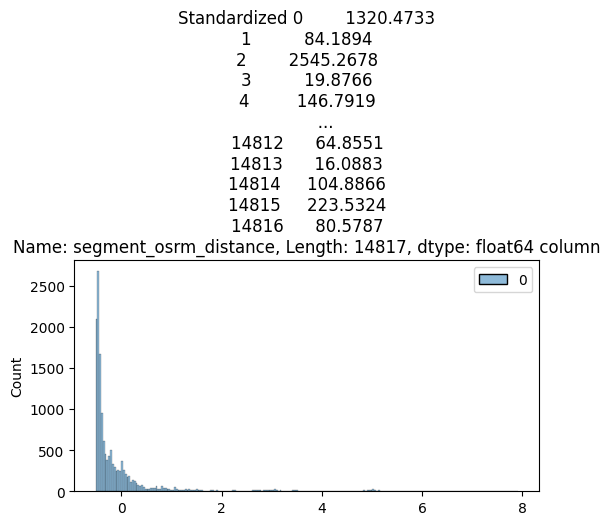

In [ ]:
plt.figure(figsize = (6,3))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_osrm_distance']} column")
plt.plot()


### Business Insights:

1. The data is given from the period **12TH SEPTEMBER** to **3RD OCTOBER** of the year **2018**.

2. There are about **14817** unique **trip IDs**, **30** unique **source states**, **32** unique **destination_states**, 690 unique source cities, 806 unique destination cities.

3. Most of the data is of **training** type.

4. Most common route type is **Carting**.

5. There are **10 unknown source centres** and **13 unknown destination centres**.

6. The number of trips start increasing after the noon, and reaches **maximum at 10 P.M** and then start decreasing.

7. Maximum trips are created in the **38th week** of the year.

8. Most trips happen during **mid-month**. That means customers usually make more orders in the mid of the month.

9. Most trips are originated from **Maharastra** state and **Mumbai** city.

10. Maximum trips are destinated to **Maharashtra** state and **Mumbai** city.

11. cities like Bengaluru, mumbai, gurgaon, Delhi are most frequent destination cities.

12. od_total_time and start_scan_to_end_scan are **similar**

13. actual_time and osrm_time are **different**

14. actual_time and segment_actual_time  are **similar**

15. osrm_distance and segment_osrm_distance  are **different**

16. osrm_time and segment_osrm_time  are **different**

17. There are a lot of outliers in all the numerical columns.

### Recommendations:

1. The OSRM trip planning system needs to be improved. Discrepancies need to be catered for transporters, if the routing engine is configured for optimum results.

2. osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

3. The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

4. Most orders are coming from/directed to the states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

5. Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these states and to improve customers' delivery experience.

6. From state-wise analysis, we can have an idea about the very heavy traffic in certain states and bad terrain conditions in certain other states. This will be a good indicator to plan and cater to the demand during peak festival seasons.

